# Data Download and Preparation

This notebook is to download the required data from yfinance once for all the interested tickers. Once we have the data, we no longer need to keep going out to the internet and request more data, reducing network load

In [1]:
AV_API_KEY = "C6MJB5IPZ5DV580I"

In [2]:
%pip install alpha-vantage

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
from alpha_vantage.timeseries import TimeSeries
import pandas as pd

# You'll need a free API key from https://www.alphavantage.co/support/#api-key
ts = TimeSeries(key=AV_API_KEY, output_format='pandas')

# Get daily stock data (equivalent to yf.download())
data, meta_data = ts.get_daily(symbol='AAPL', outputsize='full')

In [4]:
data.head()

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2025-08-01,210.865,213.580,201.50,202.38,104434473.0
2025-07-31,208.490,209.840,207.16,207.57,80698431.0
2025-07-30,211.895,212.390,207.72,209.05,45512514.0
2025-07-29,214.175,214.810,210.82,211.27,51411723.0
2025-07-28,214.030,214.845,213.06,214.05,37858017.0


In [5]:
import yfinance as yf
import pandas as pd
import os
from datetime import datetime

## Select tickers and date range

Initial setup for gathering all the technical data (daily price action). The following code creates secure data storage folder using os.makedirs() with error prevention.

Stock Selection Strategy:
- a bucket of tickers that are of interest
- a bucket of sector ETFs to measure the sector interest and trend
- a bucket of market indices that measure the overall market participation

Time Frame: 26+ year historical window from 1999-2025 for robust backtesting
Data Foundation: Sets parameters for comprehensive market analysis across different economic cycles

In [22]:

# Create data folder if it doesn't exist
# This ensures we have a directory to store downloaded financial data
os.makedirs('ticker_data', exist_ok=True)

# Define tickers to download
# Mixed portfolio of large-cap (AAPL, GOOGL, MSFT) and growth stocks (TSLA, PLTR, RKLB)
# Includes traditional finance (C, JPM, BK), tech (NVDA, META, NET), and emerging sectors
tickers = [
           'AAPL', 'GOOGL', 'MSFT', 'TSLA', 'AMZN', 'C', 'JPM',  
           'NVDA', 'META', 'BRK-B', 'XOM', 'WMT', 'FRFHF', 'BK',
           'TSSI', 'IREN', 'CLS', 'FUTU', 
           'PLTR', 'DAVE', 'HOOD', 'AMSC', 'OUST',
           'RKLB', 'SYM', 'CRCL', 'ATI', 'AFRM', 'ATAT', 'RYTM', 'APH',
           'URBN', 'FIX', 'ALAB', 'JBL', 'NET', 'SOFI', 'LIF', 'RMBS',
           'PWR', 'SHOP', 'VRT', 'RBLX', 
           'COIN', 'DOCS', 'TSM', 'ONC',
           'KLAC', 'SNEX', 'VEEV', 'ZS', 'KNSA', 'SNOW', 'SFM', 'ANET',
           'CRWD', 'CCJ', 'TBBK', 'ACMR', 'MIRM', 'DASH', 'TOST', 'HEI']

# Date range for historical data collection
# Covers over 25 years of market data for comprehensive analysis
start_date = '1999-01-01'  # Start from early dot-com era
end_date = '2025-06-30'    # Extended through mid-2025 for future projections

## For each ticker, download the data

In [7]:
from alpha_vantage.timeseries import TimeSeries
import pandas as pd
import time
import os
import requests.exceptions

ts = TimeSeries(key=AV_API_KEY, output_format='pandas')

# Create directory if it doesn't exist
os.makedirs("ticker_data", exist_ok=True)

# More conservative rate limiting
def safe_download_with_retry(ticker, max_retries=3):
    for attempt in range(max_retries):
        try:
            print(f"Downloading {ticker} (attempt {attempt + 1})...")
            
            # Get daily adjusted data
            data, meta_data = ts.get_daily_adjusted(symbol=ticker, outputsize='full')
            
            # Sort the data first to make it monotonic
            data = data.sort_index()
            
            # Filter data by date range if needed
            if 'start_date' in locals() and 'end_date' in locals():
                data = data[start_date:end_date]
            
            # Save to CSV
            filename = f"ticker_data/{ticker}_stock_data.csv"
            data.to_csv(filename)
            print(f"✅ Saved {ticker} to {filename}")
            return True
            
        except Exception as e:
            print(f"❌ Attempt {attempt + 1} failed for {ticker}: {e}")
            if attempt < max_retries - 1:
                wait_time = (attempt + 1) * 30  # Exponential backoff
                print(f"⏱️ Waiting {wait_time} seconds before retry...")
                time.sleep(wait_time)
            else:
                print(f"❌ All attempts failed for {ticker}")
                return False

# Download data for each ticker with more conservative timing
for i, ticker in enumerate(tickers):
    success = safe_download_with_retry(ticker)
    
    if success:
        # More conservative rate limiting: 20 seconds between requests
        print("⏱️ Waiting 2 seconds...")
        time.sleep(2)
        
        # Longer break every 4 requests instead of 5
        if (i + 1) % 4 == 0:
            print("⏱️ Taking a longer break... waiting 30 seconds")
            time.sleep(30)
    else:
        # If download failed, wait longer before next attempt
        print("⏱️ Download failed, waiting 60 seconds before next ticker...")
        time.sleep(60)

print("Download complete!")

✅ Saved COIN to ticker_data/COIN_stock_data.csv
⏱️ Waiting 2 seconds...
✅ Saved DOCS to ticker_data/DOCS_stock_data.csv
⏱️ Waiting 2 seconds...
✅ Saved TSM to ticker_data/TSM_stock_data.csv
⏱️ Waiting 2 seconds...
✅ Saved ONC to ticker_data/ONC_stock_data.csv
⏱️ Waiting 2 seconds...
⏱️ Taking a longer break... waiting 30 seconds
✅ Saved KLAC to ticker_data/KLAC_stock_data.csv
⏱️ Waiting 2 seconds...
✅ Saved SNEX to ticker_data/SNEX_stock_data.csv
⏱️ Waiting 2 seconds...
✅ Saved VEEV to ticker_data/VEEV_stock_data.csv
⏱️ Waiting 2 seconds...
✅ Saved ZS to ticker_data/ZS_stock_data.csv
⏱️ Waiting 2 seconds...
⏱️ Taking a longer break... waiting 30 seconds
✅ Saved KNSA to ticker_data/KNSA_stock_data.csv
⏱️ Waiting 2 seconds...
✅ Saved SNOW to ticker_data/SNOW_stock_data.csv
⏱️ Waiting 2 seconds...
✅ Saved SFM to ticker_data/SFM_stock_data.csv
⏱️ Waiting 2 seconds...
✅ Saved ANET to ticker_data/ANET_stock_data.csv
⏱️ Waiting 2 seconds...
⏱️ Taking a longer break... waiting 30 seconds
✅ Sav

## Data Cleanup

Remove the headers that are not required

In [8]:

# Get list of all stock data files
data_files = [f for f in os.listdir('ticker_data') if f.endswith('_stock_data.csv')]

for file in data_files:
   file_path = f'ticker_data/{file}'
   
   # Read the file
   df = pd.read_csv(file_path, index_col=0, parse_dates=True)
   
   # Remove first two rows
   df_cleaned = df.iloc[2:]
   
   # Save back to file
   df_cleaned.to_csv(file_path)
   
   print(f"Cleaned {file}")

print("All files cleaned!")

Cleaned AAPL_stock_data.csv
Cleaned ACMR_stock_data.csv
Cleaned AFRM_stock_data.csv
Cleaned ALAB_stock_data.csv
Cleaned AMSC_stock_data.csv
Cleaned AMZN_stock_data.csv
Cleaned ANET_stock_data.csv
Cleaned APH_stock_data.csv
Cleaned ATAT_stock_data.csv
Cleaned ATI_stock_data.csv
Cleaned BK_stock_data.csv


C:\Users\prao5\AppData\Local\Temp\ipykernel_80016\2121317563.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(file_path, index_col=0, parse_dates=True)


Cleaned BRK-B_stock_data.csv
Cleaned CCJ_stock_data.csv
Cleaned CLS_stock_data.csv
Cleaned COIN_stock_data.csv
Cleaned CRCL_stock_data.csv
Cleaned CRWD_stock_data.csv
Cleaned C_stock_data.csv
Cleaned DASH_stock_data.csv
Cleaned DAVE_stock_data.csv
Cleaned DOCS_stock_data.csv
Cleaned FIX_stock_data.csv
Cleaned FRFHF_stock_data.csv
Cleaned FUTU_stock_data.csv
Cleaned GOOGL_stock_data.csv
Cleaned HEI_stock_data.csv
Cleaned HOOD_stock_data.csv
Cleaned IREN_stock_data.csv
Cleaned JBL_stock_data.csv
Cleaned JPM_stock_data.csv
Cleaned KLAC_stock_data.csv
Cleaned KNSA_stock_data.csv
Cleaned LIF_stock_data.csv
Cleaned META_stock_data.csv
Cleaned MIRM_stock_data.csv
Cleaned MSFT_stock_data.csv
Cleaned NET_stock_data.csv
Cleaned NVDA_stock_data.csv
Cleaned ONC_stock_data.csv
Cleaned OUST_stock_data.csv
Cleaned PLTR_stock_data.csv
Cleaned PWR_stock_data.csv
Cleaned RBLX_stock_data.csv
Cleaned RKLB_stock_data.csv
Cleaned RMBS_stock_data.csv
Cleaned RYTM_stock_data.csv
Cleaned SFM_stock_data.csv
Cle

## Get Sector data for 10-15 years to understand patterns

In [9]:
import os

os.makedirs('sector_data', exist_ok=True)

sectors = ['XLK','XLV','XLE','XLI','XLP','XLU','XLF','XLY','XLB','XLC','XLRE']

# Date range for historical data collection
# Covers over 25 years of market data for comprehensive analysis
start_date = '1980-01-01'  # Start from as early as possible for sector analysis
end_date = '2025-06-30'    # Extended through mid-2025 for future projections

In [10]:
from alpha_vantage.timeseries import TimeSeries
import pandas as pd
import time
import os

ts = TimeSeries(key=AV_API_KEY, output_format='pandas')

# Create directory if it doesn't exist
os.makedirs("sector_data", exist_ok=True)

# Robust download function with retry logic
def safe_download_with_retry(sector, max_retries=3):
    for attempt in range(max_retries):
        try:
            print(f"Downloading {sector} (attempt {attempt + 1})...")
            
            # Get daily adjusted data
            data, meta_data = ts.get_daily_adjusted(symbol=sector, outputsize='full')
            
            # Sort the data first to make it monotonic
            data = data.sort_index()
            
            # Filter data by date range if needed
            if 'start_date' in locals() and 'end_date' in locals():
                data = data[start_date:end_date]
            
            # Save to CSV
            filename = f"sector_data/{sector}_stock_data.csv"
            data.to_csv(filename)
            print(f"✅ Saved {sector} to {filename}")
            return True
            
        except Exception as e:
            print(f"❌ Attempt {attempt + 1} failed for {sector}: {e}")
            if attempt < max_retries - 1:
                wait_time = (attempt + 1) * 30  # Exponential backoff
                print(f"⏱️ Waiting {wait_time} seconds before retry...")
                time.sleep(wait_time)
            else:
                print(f"❌ All attempts failed for {sector}")
                return False

# Download data for each sector with conservative timing
for i, sector in enumerate(sectors):
    success = safe_download_with_retry(sector)
    
    if success:
        # Conservative rate limiting: 20 seconds between requests
        print("⏱️ Waiting 2 seconds...")
        time.sleep(2)
        
        # Longer break every 4 requests
        if (i + 1) % 4 == 0:
            print("⏱️ Taking a longer break... waiting 30 seconds")
            time.sleep(30)
    else:
        # If download failed, wait longer before next attempt
        print("⏱️ Download failed, waiting 60 seconds before next sector...")
        time.sleep(60)

print("Download complete!")

✅ Saved XLK to sector_data/XLK_stock_data.csv
⏱️ Waiting 2 seconds...
✅ Saved XLV to sector_data/XLV_stock_data.csv
⏱️ Waiting 2 seconds...
✅ Saved XLE to sector_data/XLE_stock_data.csv
⏱️ Waiting 2 seconds...
✅ Saved XLI to sector_data/XLI_stock_data.csv
⏱️ Waiting 2 seconds...
⏱️ Taking a longer break... waiting 30 seconds
✅ Saved XLP to sector_data/XLP_stock_data.csv
⏱️ Waiting 2 seconds...
✅ Saved XLU to sector_data/XLU_stock_data.csv
⏱️ Waiting 2 seconds...
✅ Saved XLF to sector_data/XLF_stock_data.csv
⏱️ Waiting 2 seconds...
✅ Saved XLY to sector_data/XLY_stock_data.csv
⏱️ Waiting 2 seconds...
⏱️ Taking a longer break... waiting 30 seconds
✅ Saved XLB to sector_data/XLB_stock_data.csv
⏱️ Waiting 2 seconds...
✅ Saved XLC to sector_data/XLC_stock_data.csv
⏱️ Waiting 2 seconds...
✅ Saved XLRE to sector_data/XLRE_stock_data.csv
⏱️ Waiting 2 seconds...
Download complete!


In [11]:

data_files = [f for f in os.listdir('sector_data') if f.endswith('_stock_data.csv')]

for file in data_files:
   file_path = f'sector_data/{file}'
   
   # Read the file
   df = pd.read_csv(file_path, index_col=0, parse_dates=True)
   
   # Remove first two rows
   df_cleaned = df.iloc[2:]
   
   # Save back to file
   df_cleaned.to_csv(file_path)
   
   print(f"Cleaned {file}")

print("All files cleaned!")

Cleaned XLB_stock_data.csv
Cleaned XLC_stock_data.csv
Cleaned XLE_stock_data.csv
Cleaned XLF_stock_data.csv
Cleaned XLI_stock_data.csv
Cleaned XLK_stock_data.csv
Cleaned XLP_stock_data.csv
Cleaned XLRE_stock_data.csv
Cleaned XLU_stock_data.csv
Cleaned XLV_stock_data.csv
Cleaned XLY_stock_data.csv
All files cleaned!


## Lets analyze what sectors work in bullish market and what is favorable in bearish

In [13]:
print("Loading sector data for bull/bear analysis...")

# Load sector ETF data from local CSV files
sector_data = {}
data_folder = 'sector_data'

for sector in sectors:
    try:
        filename = f"{sector}_stock_data.csv"
        filepath = os.path.join(data_folder, filename)
        df = pd.read_csv(filepath, index_col=0, parse_dates=True)
        
        # Use Alpha Vantage column name for adjusted close price
        sector_data[sector] = df['5. adjusted close']  # Changed from 'Close'
        
    except Exception as e:
        print(f"Error loading {sector}: {e}")

# Create DataFrame and calculate returns
sector_prices = pd.DataFrame(sector_data)
sector_prices = sector_prices.dropna(axis=1, how='all').fillna(method='ffill')
sector_returns = sector_prices.pct_change().dropna()

# Calculate market conditions (using average sector performance as proxy)
market_proxy = sector_returns.mean(axis=1)
top_10_days = market_proxy.quantile(0.9)      # Bull market days (top 10%)
bottom_10_days = market_proxy.quantile(0.1)   # Bear market days (bottom 10%)

# Calculate performance during bull and bear days
bull_performance = sector_returns[market_proxy >= top_10_days].mean()
bear_performance = sector_returns[market_proxy <= bottom_10_days].mean()

# Print results
print("\n" + "="*60)
print("SECTOR PERFORMANCE ANALYSIS")
print("="*60)

print(f"\nBull Market Analysis: {len(sector_returns[market_proxy >= top_10_days])} trading days")
print(f"Bear Market Analysis: {len(sector_returns[market_proxy <= bottom_10_days])} trading days")

print("\nSECTOR PERFORMANCE ON BULL MARKET DAYS (Top 10% Market Days):")
print("-" * 55)
bull_performance_pct = (bull_performance * 100).sort_values(ascending=False)
for sector, performance in bull_performance_pct.items():
    print(f"{sector}: {performance:+.2f}%")

print("\nSECTOR PERFORMANCE ON BEAR MARKET DAYS (Bottom 10% Market Days):")
print("-" * 57)
bear_performance_pct = (bear_performance * 100).sort_values(ascending=False)
for sector, performance in bear_performance_pct.items():
    print(f"{sector}: {performance:+.2f}%")

# Calculate and show the spread between bull and bear performance
print("\nBULL vs BEAR PERFORMANCE SPREAD:")
print("-" * 35)
spread = (bull_performance - bear_performance) * 100
spread_sorted = spread.sort_values(ascending=False)
for sector, spread_val in spread_sorted.items():
    print(f"{sector}: {spread_val:+.2f}% spread")

print("\n" + "="*60)

Loading sector data for bull/bear analysis...

SECTOR PERFORMANCE ANALYSIS

Bull Market Analysis: 179 trading days
Bear Market Analysis: 179 trading days

SECTOR PERFORMANCE ON BULL MARKET DAYS (Top 10% Market Days):
-------------------------------------------------------
XLK: +2.43%
XLE: +2.40%
XLF: +2.36%
XLY: +2.25%
XLB: +2.22%
XLI: +2.17%
XLC: +1.97%
XLRE: +1.92%
XLU: +1.53%
XLV: +1.49%
XLP: +1.24%

SECTOR PERFORMANCE ON BEAR MARKET DAYS (Bottom 10% Market Days):
---------------------------------------------------------
XLP: -1.32%
XLU: -1.55%
XLV: -1.60%
XLRE: -2.10%
XLC: -2.22%
XLB: -2.25%
XLI: -2.26%
XLF: -2.44%
XLY: -2.48%
XLE: -2.53%
XLK: -2.55%

BULL vs BEAR PERFORMANCE SPREAD:
-----------------------------------
XLK: +4.99% spread
XLE: +4.94% spread
XLF: +4.80% spread
XLY: +4.73% spread
XLB: +4.47% spread
XLI: +4.43% spread
XLC: +4.19% spread
XLRE: +4.02% spread
XLV: +3.09% spread
XLU: +3.08% spread
XLP: +2.56% spread



C:\Users\prao5\AppData\Local\Temp\ipykernel_80016\169350862.py:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  sector_prices = sector_prices.dropna(axis=1, how='all').fillna(method='ffill')


## Sector Rotation Analysis

On bullish days the hypothesis is technology and innovation stands to gain. On bearish days, money is moved to more consumer staples - everyone needs to brush their teeth. 

The above sector analysis has revealed some interesting insights: 
Bull Markets: XLK dominates and XLP lags
Bear Markets: XLP loses least and XLK gets crushed

Risk-On Leaders (Bull Days): XLK, XLE, XLF - cyclical, high-beta sectors
Defensive Winners (Bear Days): XLP, XLU, XLV - consumer staples, utilities, healthcare
Energy (XLE) is extremely cyclical - 2nd best bull performer and 2nd worst bear performer
Financials (XLF) follow economic cycle - strong bull performance but heavy bear losses
Consumer Staples (XLP) are true defense - worst bull performer (+1.24%) but best bear protection (-1.33%)

Investment Strategy Implications:
Momentum Strategy: Rotate into XLK, XLE, XLF during bull markets
Defensive Strategy: Rotate into XLP, XLU, XLV during bear markets
Highest Alpha Opportunity: XLK has the widest spread (5.03%) - most timing potential
Risk Management: XLU provides consistent downside protection while still participating in upside

## Lets analyze patterns by month. Which month favors which sector over the past 15 years

Analyzing seasonal trends in sector performance...


Text(220.72222222222223, 0.5, 'Sector ETFs')

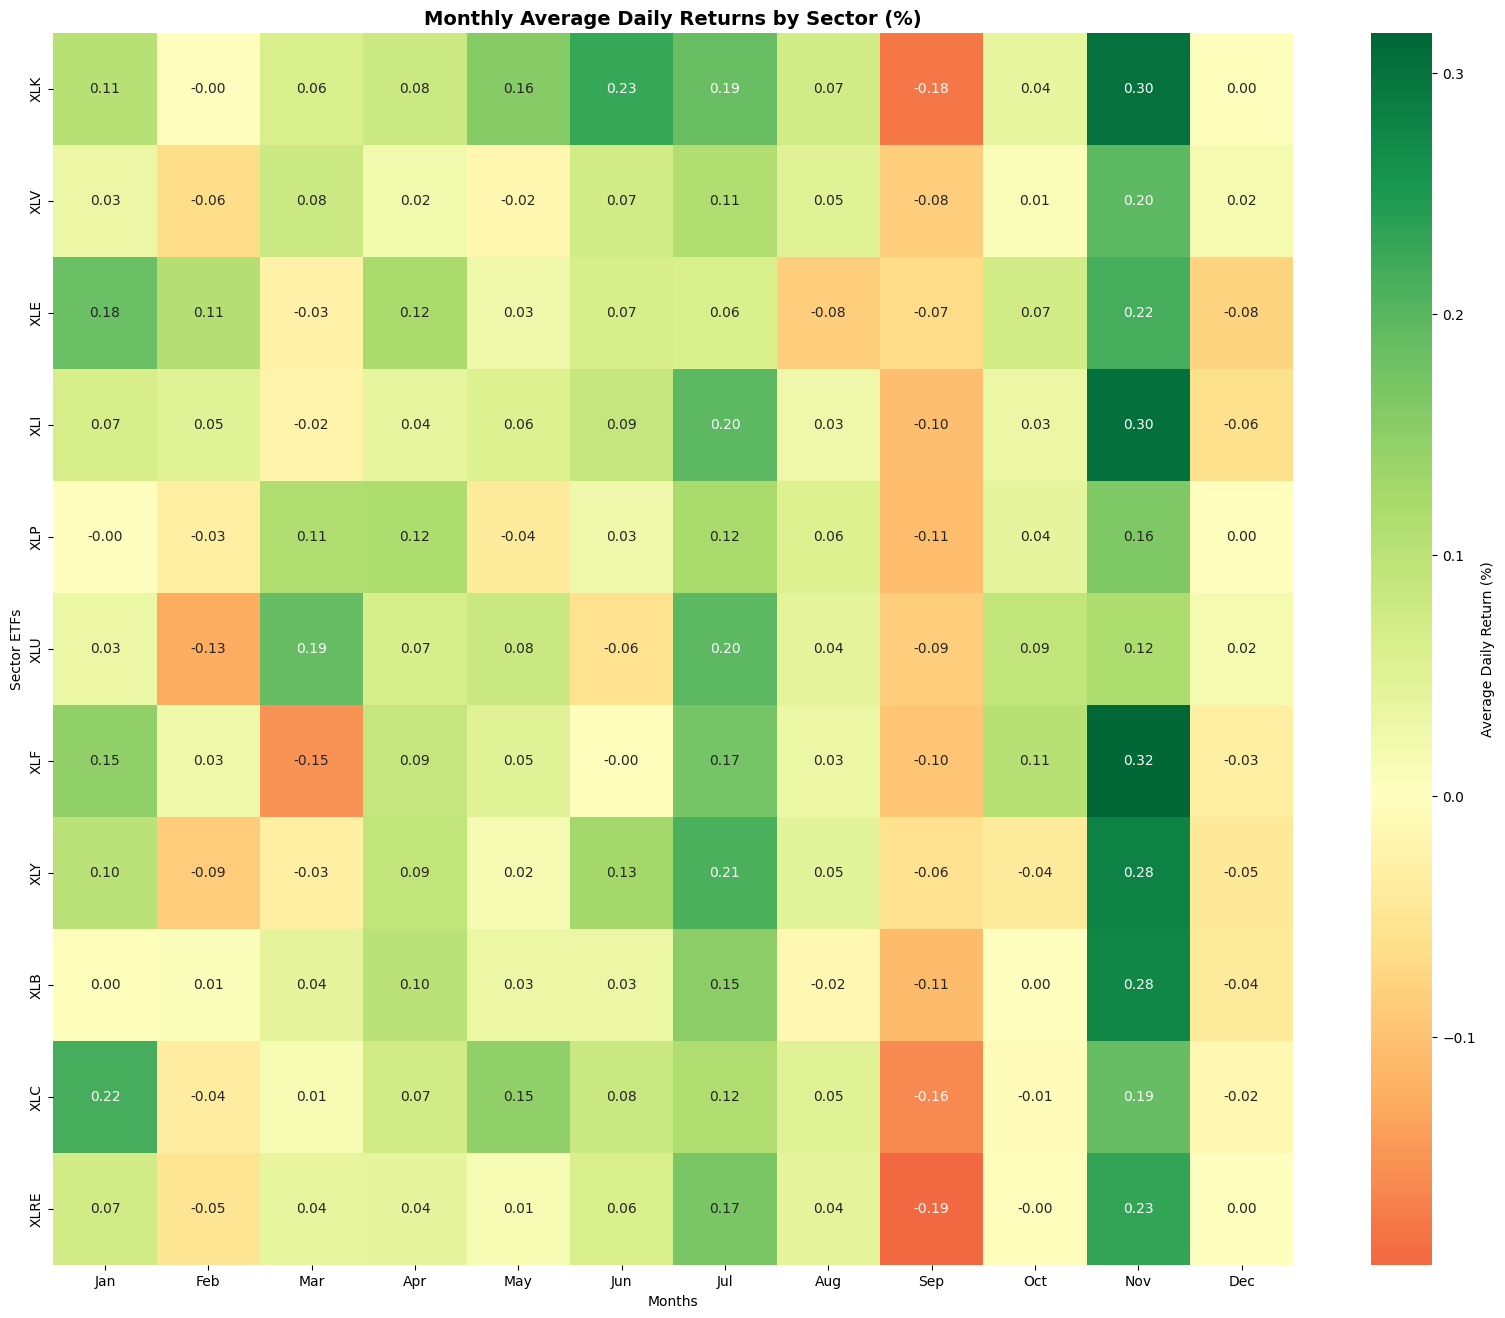

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Analyzing seasonal trends in sector performance...")

# Extract month and quarter from returns data
sector_returns_with_dates = sector_returns.copy()
sector_returns_with_dates['Month'] = sector_returns_with_dates.index.month
sector_returns_with_dates['Quarter'] = sector_returns_with_dates.index.quarter

# Calculate monthly statistics
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

monthly_avg_data = []
monthly_std_data = []

for month in range(1, 13):
    month_data = sector_returns_with_dates[sector_returns_with_dates['Month'] == month]
    month_returns = month_data[sectors]
    
    monthly_avg = (month_returns.mean() * 100)
    monthly_std = (month_returns.std() * 100)
    
    monthly_avg_data.append(monthly_avg)
    monthly_std_data.append(monthly_std)

# Create DataFrames for plotting
monthly_avg_df = pd.DataFrame(monthly_avg_data, index=month_names, columns=sectors)
monthly_std_df = pd.DataFrame(monthly_std_data, index=month_names, columns=sectors)

# Create comprehensive visualization
fig, (ax1) = plt.subplots(1, 1, figsize=(20, 16))

# 1. Monthly Average Returns Heatmap
sns.heatmap(monthly_avg_df.T, 
            annot=True, 
            fmt='.2f',
            cmap='RdYlGn',
            center=0,
            cbar_kws={'label': 'Average Daily Return (%)'},
            ax=ax1)
ax1.set_title('Monthly Average Daily Returns by Sector (%)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Months')
ax1.set_ylabel('Sector ETFs')



## Sector Daily Performance by Month

July and November are the best months for all sectors
September is the worst month

Analyzing seasonal trends in sector performance...


C:\Users\prao5\AppData\Local\Temp\ipykernel_80016\2140487122.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sector_prices_monthly = sector_prices.resample('M').last()  # Get month-end prices


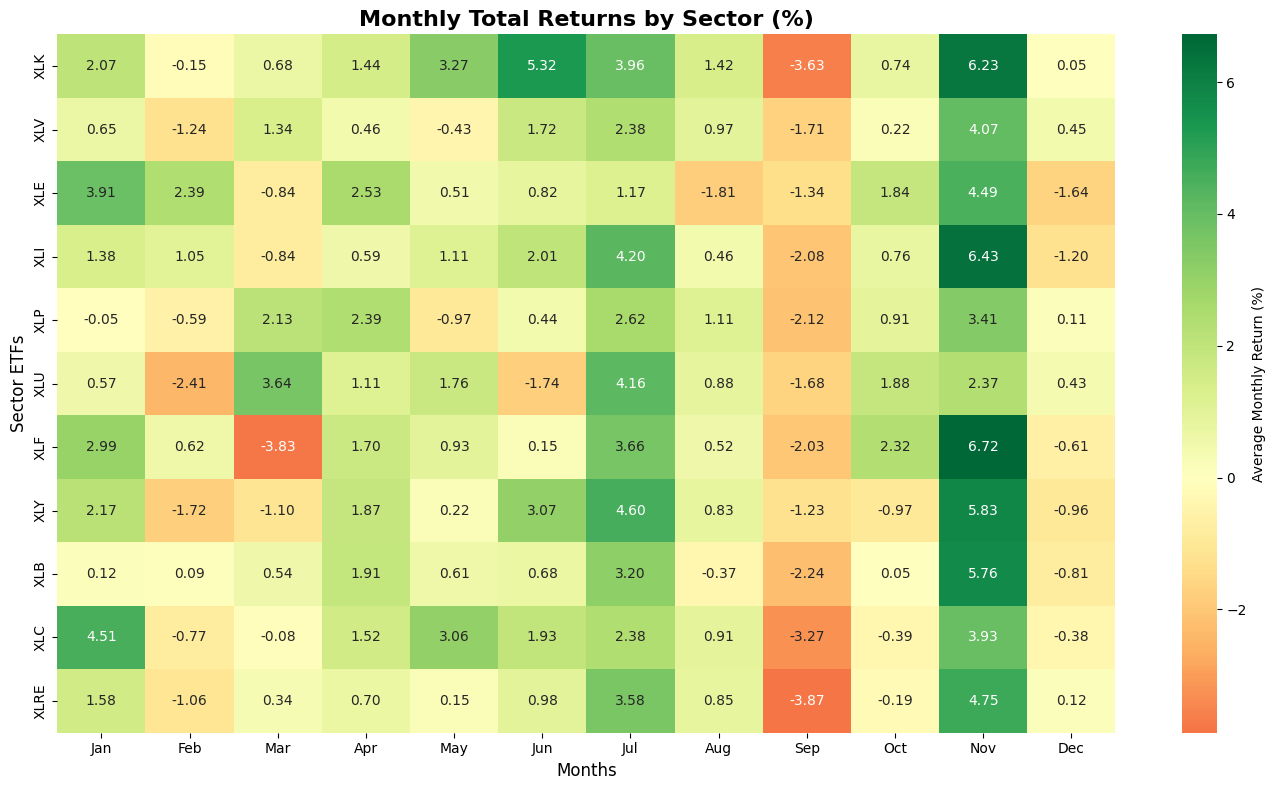


SEASONAL INSIGHTS - TOTAL MONTHLY RETURNS:

BEST PERFORMING SECTORS BY MONTH (Total Monthly Returns):
-------------------------------------------------------
Jan: XLC (+4.51%) | Worst: XLP (-0.05%)
Feb: XLE (+2.39%) | Worst: XLU (-2.41%)
Mar: XLU (+3.64%) | Worst: XLF (-3.83%)
Apr: XLE (+2.53%) | Worst: XLV (+0.46%)
May: XLK (+3.27%) | Worst: XLP (-0.97%)
Jun: XLK (+5.32%) | Worst: XLU (-1.74%)
Jul: XLY (+4.60%) | Worst: XLE (+1.17%)
Aug: XLK (+1.42%) | Worst: XLE (-1.81%)
Sep: XLY (-1.23%) | Worst: XLRE (-3.87%)
Oct: XLF (+2.32%) | Worst: XLY (-0.97%)
Nov: XLF (+6.72%) | Worst: XLU (+2.37%)
Dec: XLV (+0.45%) | Worst: XLE (-1.64%)

BEST PERFORMING SECTORS BY QUARTER (Total Monthly Returns):
---------------------------------------------------------
Q1: XLE (+1.82%)
Q2: XLK (+3.34%)
Q3: XLY (+1.52%)
Q4: XLF (+2.81%)

Most consistent monthly leader: XLK (3 months)

MONTHLY VOLATILITY RANKINGS (Highest to Lowest):
---------------------------------------------
 1. XLE: 9.66%
 2. XLY: 6.49%

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Analyzing seasonal trends in sector performance...")

# Calculate monthly total returns instead of daily averages
sector_prices_monthly = sector_prices.resample('M').last()  # Get month-end prices
monthly_total_returns = sector_prices_monthly.pct_change().dropna()  # Month-over-month returns

# Add month and quarter columns
monthly_total_returns['Month'] = monthly_total_returns.index.month
monthly_total_returns['Quarter'] = monthly_total_returns.index.quarter

# Calculate monthly statistics using total monthly returns
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

monthly_avg_data = []
monthly_std_data = []

for month in range(1, 13):
    month_data = monthly_total_returns[monthly_total_returns['Month'] == month]
    month_returns = month_data[sectors]  # Only sector columns
    
    # Convert to percentage and calculate statistics
    monthly_avg = (month_returns.mean() * 100)
    monthly_std = (month_returns.std() * 100)
    
    monthly_avg_data.append(monthly_avg)
    monthly_std_data.append(monthly_std)

# Create DataFrames for plotting
monthly_avg_df = pd.DataFrame(monthly_avg_data, index=month_names, columns=sectors)
monthly_std_df = pd.DataFrame(monthly_std_data, index=month_names, columns=sectors)

# Calculate quarterly statistics using total monthly returns
quarter_names = ['Q1', 'Q2', 'Q3', 'Q4']
quarterly_avg_data = []
quarterly_std_data = []

for quarter in range(1, 5):
    quarter_data = monthly_total_returns[monthly_total_returns['Quarter'] == quarter]
    quarter_returns = quarter_data[sectors]
    
    quarterly_avg = (quarter_returns.mean() * 100)
    quarterly_std = (quarter_returns.std() * 100)
    
    quarterly_avg_data.append(quarterly_avg)
    quarterly_std_data.append(quarterly_std)

quarterly_avg_df = pd.DataFrame(quarterly_avg_data, index=quarter_names, columns=sectors)
quarterly_std_df = pd.DataFrame(quarterly_std_data, index=quarter_names, columns=sectors)

# Create visualization - Monthly Total Returns Heatmap only
fig, ax1 = plt.subplots(1, 1, figsize=(14, 8))

# Monthly Total Returns Heatmap
sns.heatmap(monthly_avg_df.T, 
            annot=True, 
            fmt='.2f',
            cmap='RdYlGn',
            center=0,
            cbar_kws={'label': 'Average Monthly Return (%)'},
            ax=ax1)
ax1.set_title('Monthly Total Returns by Sector (%)', fontsize=16, fontweight='bold')
ax1.set_xlabel('Months', fontsize=12)
ax1.set_ylabel('Sector ETFs', fontsize=12)

plt.tight_layout()
plt.show()

# Print key seasonal insights
print("\n" + "="*70)
print("SEASONAL INSIGHTS - TOTAL MONTHLY RETURNS:")
print("="*45)

# Best performing sectors by month
print("\nBEST PERFORMING SECTORS BY MONTH (Total Monthly Returns):")
print("-" * 55)
for month in range(12):
    best_sector = monthly_avg_df.iloc[month].idxmax()
    best_performance = monthly_avg_df.iloc[month].max()
    worst_sector = monthly_avg_df.iloc[month].idxmin()
    worst_performance = monthly_avg_df.iloc[month].min()
    print(f"{month_names[month]}: {best_sector} ({best_performance:+.2f}%) | Worst: {worst_sector} ({worst_performance:+.2f}%)")

# Best performing sectors by quarter
print("\nBEST PERFORMING SECTORS BY QUARTER (Total Monthly Returns):")
print("-" * 57)
for quarter in range(4):
    best_sector = quarterly_avg_df.iloc[quarter].idxmax()
    best_performance = quarterly_avg_df.iloc[quarter].max()
    print(f"{quarter_names[quarter]}: {best_sector} ({best_performance:+.2f}%)")

# Most consistent performers
monthly_winners = [monthly_avg_df.iloc[month].idxmax() for month in range(12)]
winner_counts = pd.Series(monthly_winners).value_counts()
print(f"\nMost consistent monthly leader: {winner_counts.index[0]} ({winner_counts.iloc[0]} months)")

# Monthly volatility ranking
print(f"\nMONTHLY VOLATILITY RANKINGS (Highest to Lowest):")
print("-" * 45)
avg_monthly_vol = monthly_std_df.mean().sort_values(ascending=False)
for i, (sector, vol) in enumerate(avg_monthly_vol.items(), 1):
    print(f"{i:2d}. {sector}: {vol:.2f}%")

# Show months with highest/lowest overall market performance
overall_monthly_performance = monthly_avg_df.mean(axis=1).sort_values(ascending=False)
print(f"\nBEST/WORST MONTHS FOR OVERALL MARKET:")
print("-" * 38)
print(f"Best month: {overall_monthly_performance.index[0]} ({overall_monthly_performance.iloc[0]:+.2f}%)")
print(f"Worst month: {overall_monthly_performance.index[-1]} ({overall_monthly_performance.iloc[-1]:+.2f}%)")

print(f"\nAnalysis based on {len(monthly_total_returns)} months of data")
print("="*70)

## Why is XLC up in Jan? Why is December Down and January Up?

December generally is a down month for XLC, and investors are probably getting back in. XLC is heavily weighted towards large technology and communication companies. The performance of these companies, such as Meta Platforms, Alphabet, and Netflix, significantly impacts XLC's overall return.

I asked Gemini, and the only reliable explanation I found were the following explanations:

- The Communication Services Select Sector SPDR® Fund (XLC) does not consistently increase in value at the beginning of each year. While it has experienced positive January returns in some years, this pattern is not a reliable trend.
- Tax-loss Harvesting: Investors may sell underperforming stocks in December to realize tax losses, leading to a rebound in January as selling pressure eases.
- Year-end Bonuses: Investors may use year-end bonuses to buy stocks in January, increasing demand.
Portfolio Rebalancing: Investors and institutions may rebalance their portfolios at the start of the year, leading to increased buying.

## Why is September a down month?

I asked Gemini what could be causing the market trends.  Here is the explanation I found:

- "Sell in May and Go Away": This well-known adage suggests that the period from May to October, which includes August, tends to be weaker for stock market returns. This is supported by data from the Stock Trader's Almanac showing the S&P 500 averaging a 7.5% return from November to April, but only 1.5% from May to October.
- Summer Doldrums: August falls within the "summer doldrums," a period of lower trading activity as many investors take vacations. This reduced volume can lead to higher volatility and potentially lower overall market performance.
- Historical Performance: Over the past 20 years, the S&P 500 has averaged a 0.1% loss in August. Go back 10 years, and the average gain is a meager 0.1%, making it the third-worst month historically.

## Why is November Up?
- The "November Effect": Research suggests that returns from November through April have been significantly higher than returns from May through October in most stock markets globally.
- "Sell in May" Counterpoint: Savvy investors might return to the market around Halloween (end of October) to capitalize on the historically stronger November through April period.
- Potential Drivers: Some theories suggest the November effect could be related to mutual fund behavior or tax-related activities, though pinpointing a definitive cause is difficult.

## Why is XLF down in March on average?

Per Gemini, this is not a consistent theme. This is because XLF benefits from higher interest rates, and loses on lower interest rates. Loan demand also causes XLF to perform well. Banks hold bonds, and bonds decrease in value with higher interest rates. 

[None, None, None, None]

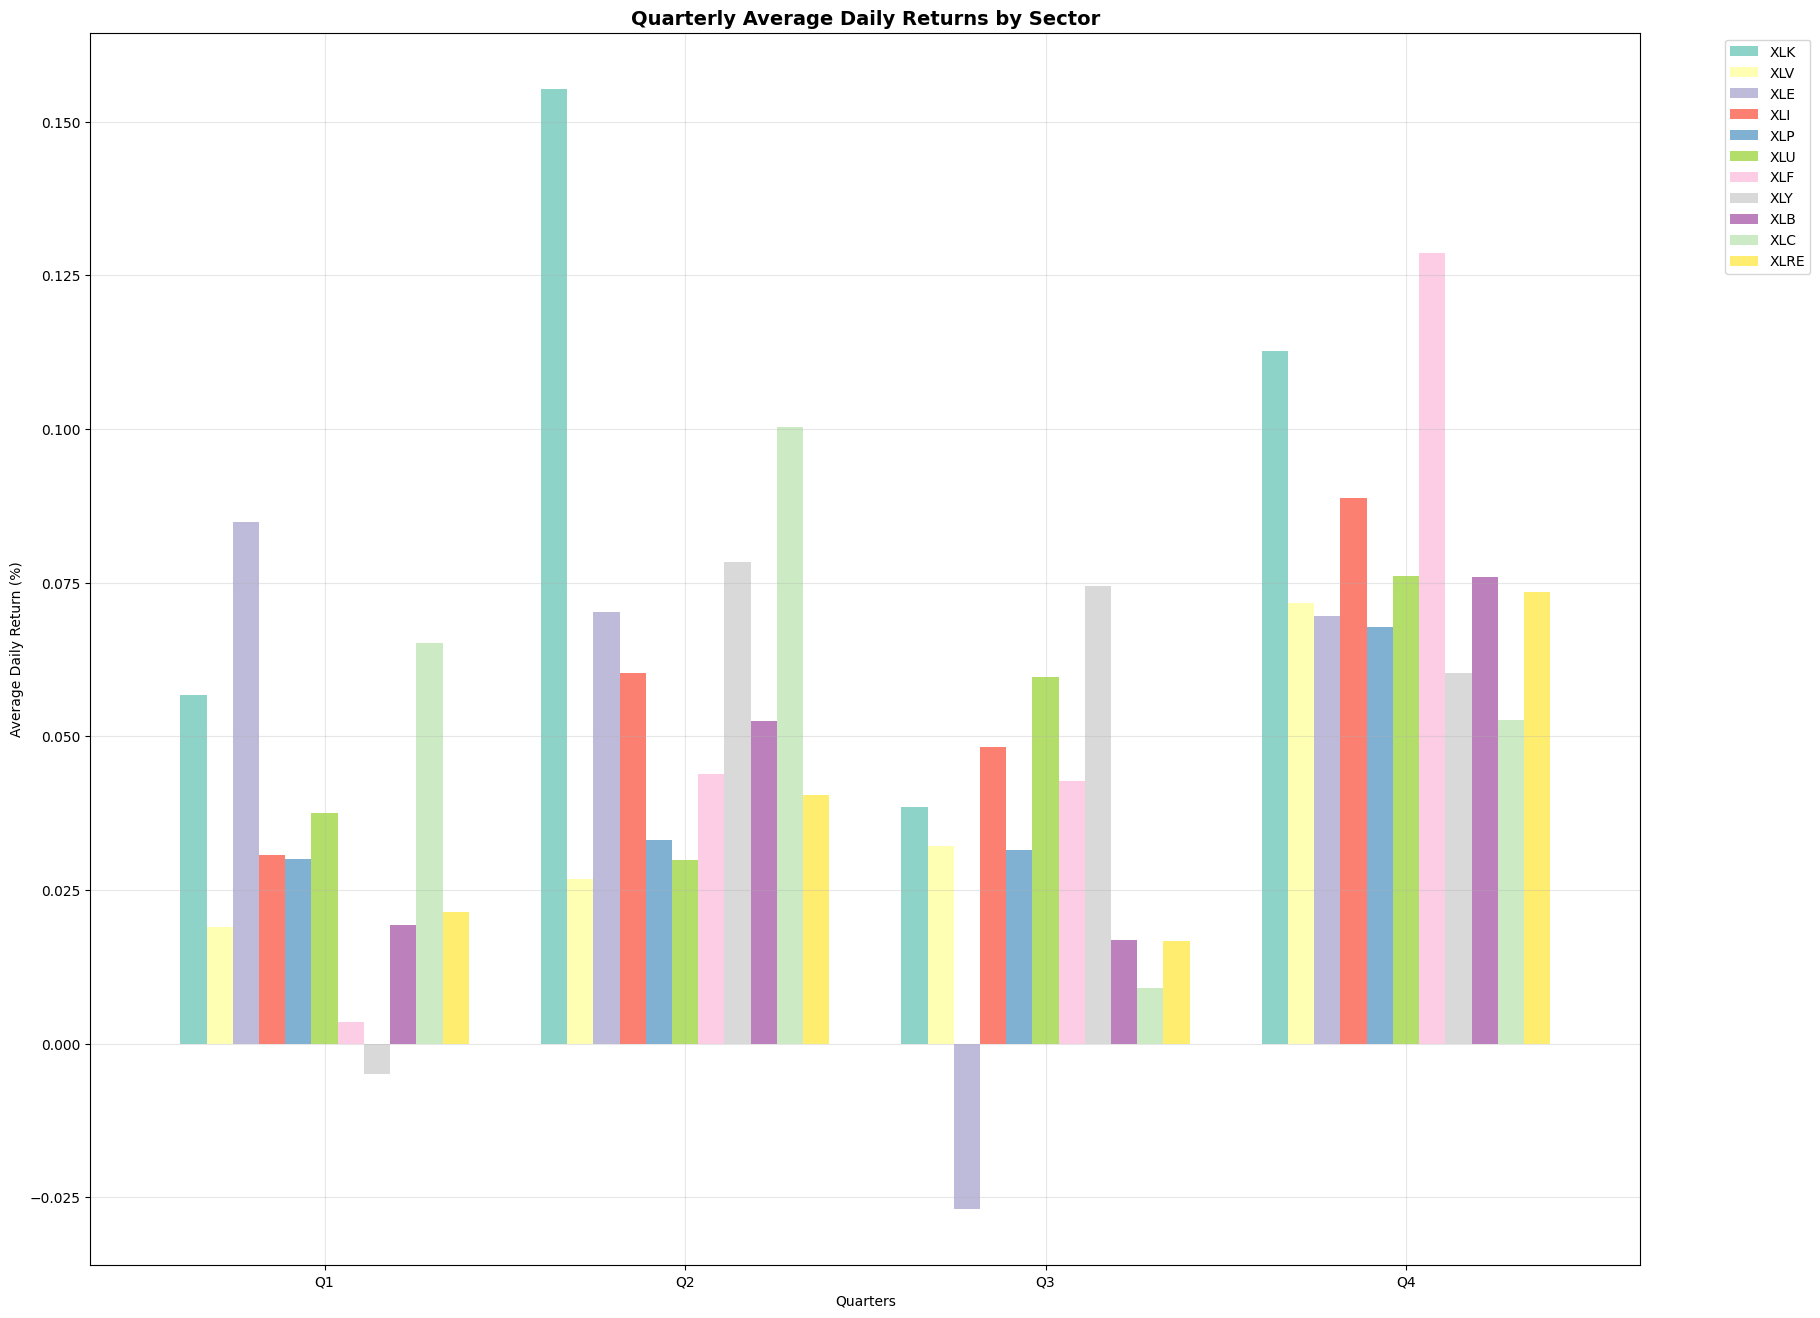

In [16]:

# Calculate quarterly statistics
quarter_names = ['Q1', 'Q2', 'Q3', 'Q4']
quarterly_avg_data = []
quarterly_std_data = []

for quarter in range(1, 5):
    quarter_data = sector_returns_with_dates[sector_returns_with_dates['Quarter'] == quarter]
    quarter_returns = quarter_data[sectors]
    
    quarterly_avg = (quarter_returns.mean() * 100)
    quarterly_std = (quarter_returns.std() * 100)
    
    quarterly_avg_data.append(quarterly_avg)
    quarterly_std_data.append(quarterly_std)

quarterly_avg_df = pd.DataFrame(quarterly_avg_data, index=quarter_names, columns=sectors)
quarterly_std_df = pd.DataFrame(quarterly_std_data, index=quarter_names, columns=sectors)

# Create comprehensive visualization
fig, (ax2) = plt.subplots(1, 1, figsize=(20, 16))

# 2. Quarterly Performance Bar Chart
quarterly_avg_df.plot(kind='bar', ax=ax2, width=0.8, colormap='Set3')
ax2.set_title('Quarterly Average Daily Returns by Sector', fontsize=14, fontweight='bold')
ax2.set_ylabel('Average Daily Return (%)')
ax2.set_xlabel('Quarters')
ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax2.grid(True, alpha=0.3)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=0)


## Some sectors are more volatile than others, and that is risk and opportunity

Text(220.72222222222223, 0.5, 'Sector ETFs')

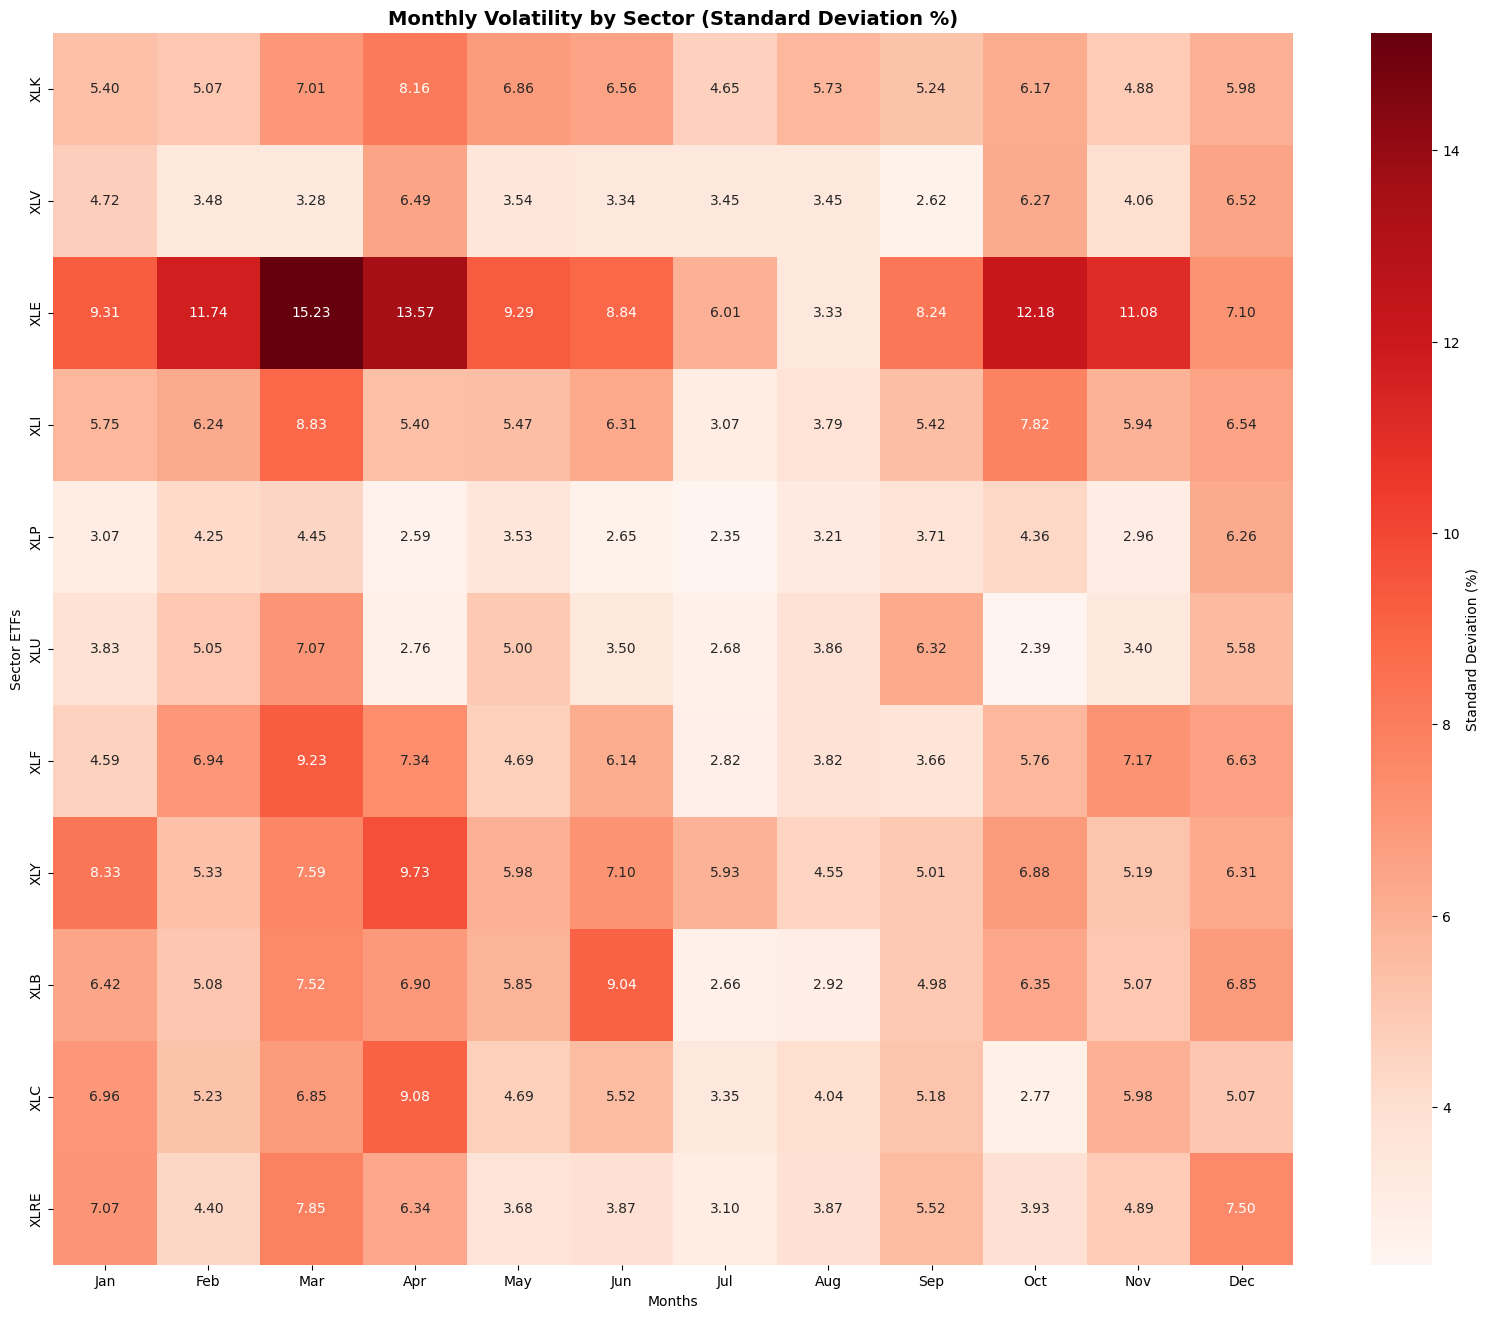

In [17]:

# Create comprehensive visualization
fig, (ax3) = plt.subplots(1, 1, figsize=(20, 16))

# 3. Monthly Volatility (Standard Deviation) Heatmap
sns.heatmap(monthly_std_df.T,
            annot=True,
            fmt='.2f', 
            cmap='Reds',
            cbar_kws={'label': 'Standard Deviation (%)'},
            ax=ax3)
ax3.set_title('Monthly Volatility by Sector (Standard Deviation %)', fontsize=14, fontweight='bold')
ax3.set_xlabel('Months')
ax3.set_ylabel('Sector ETFs')


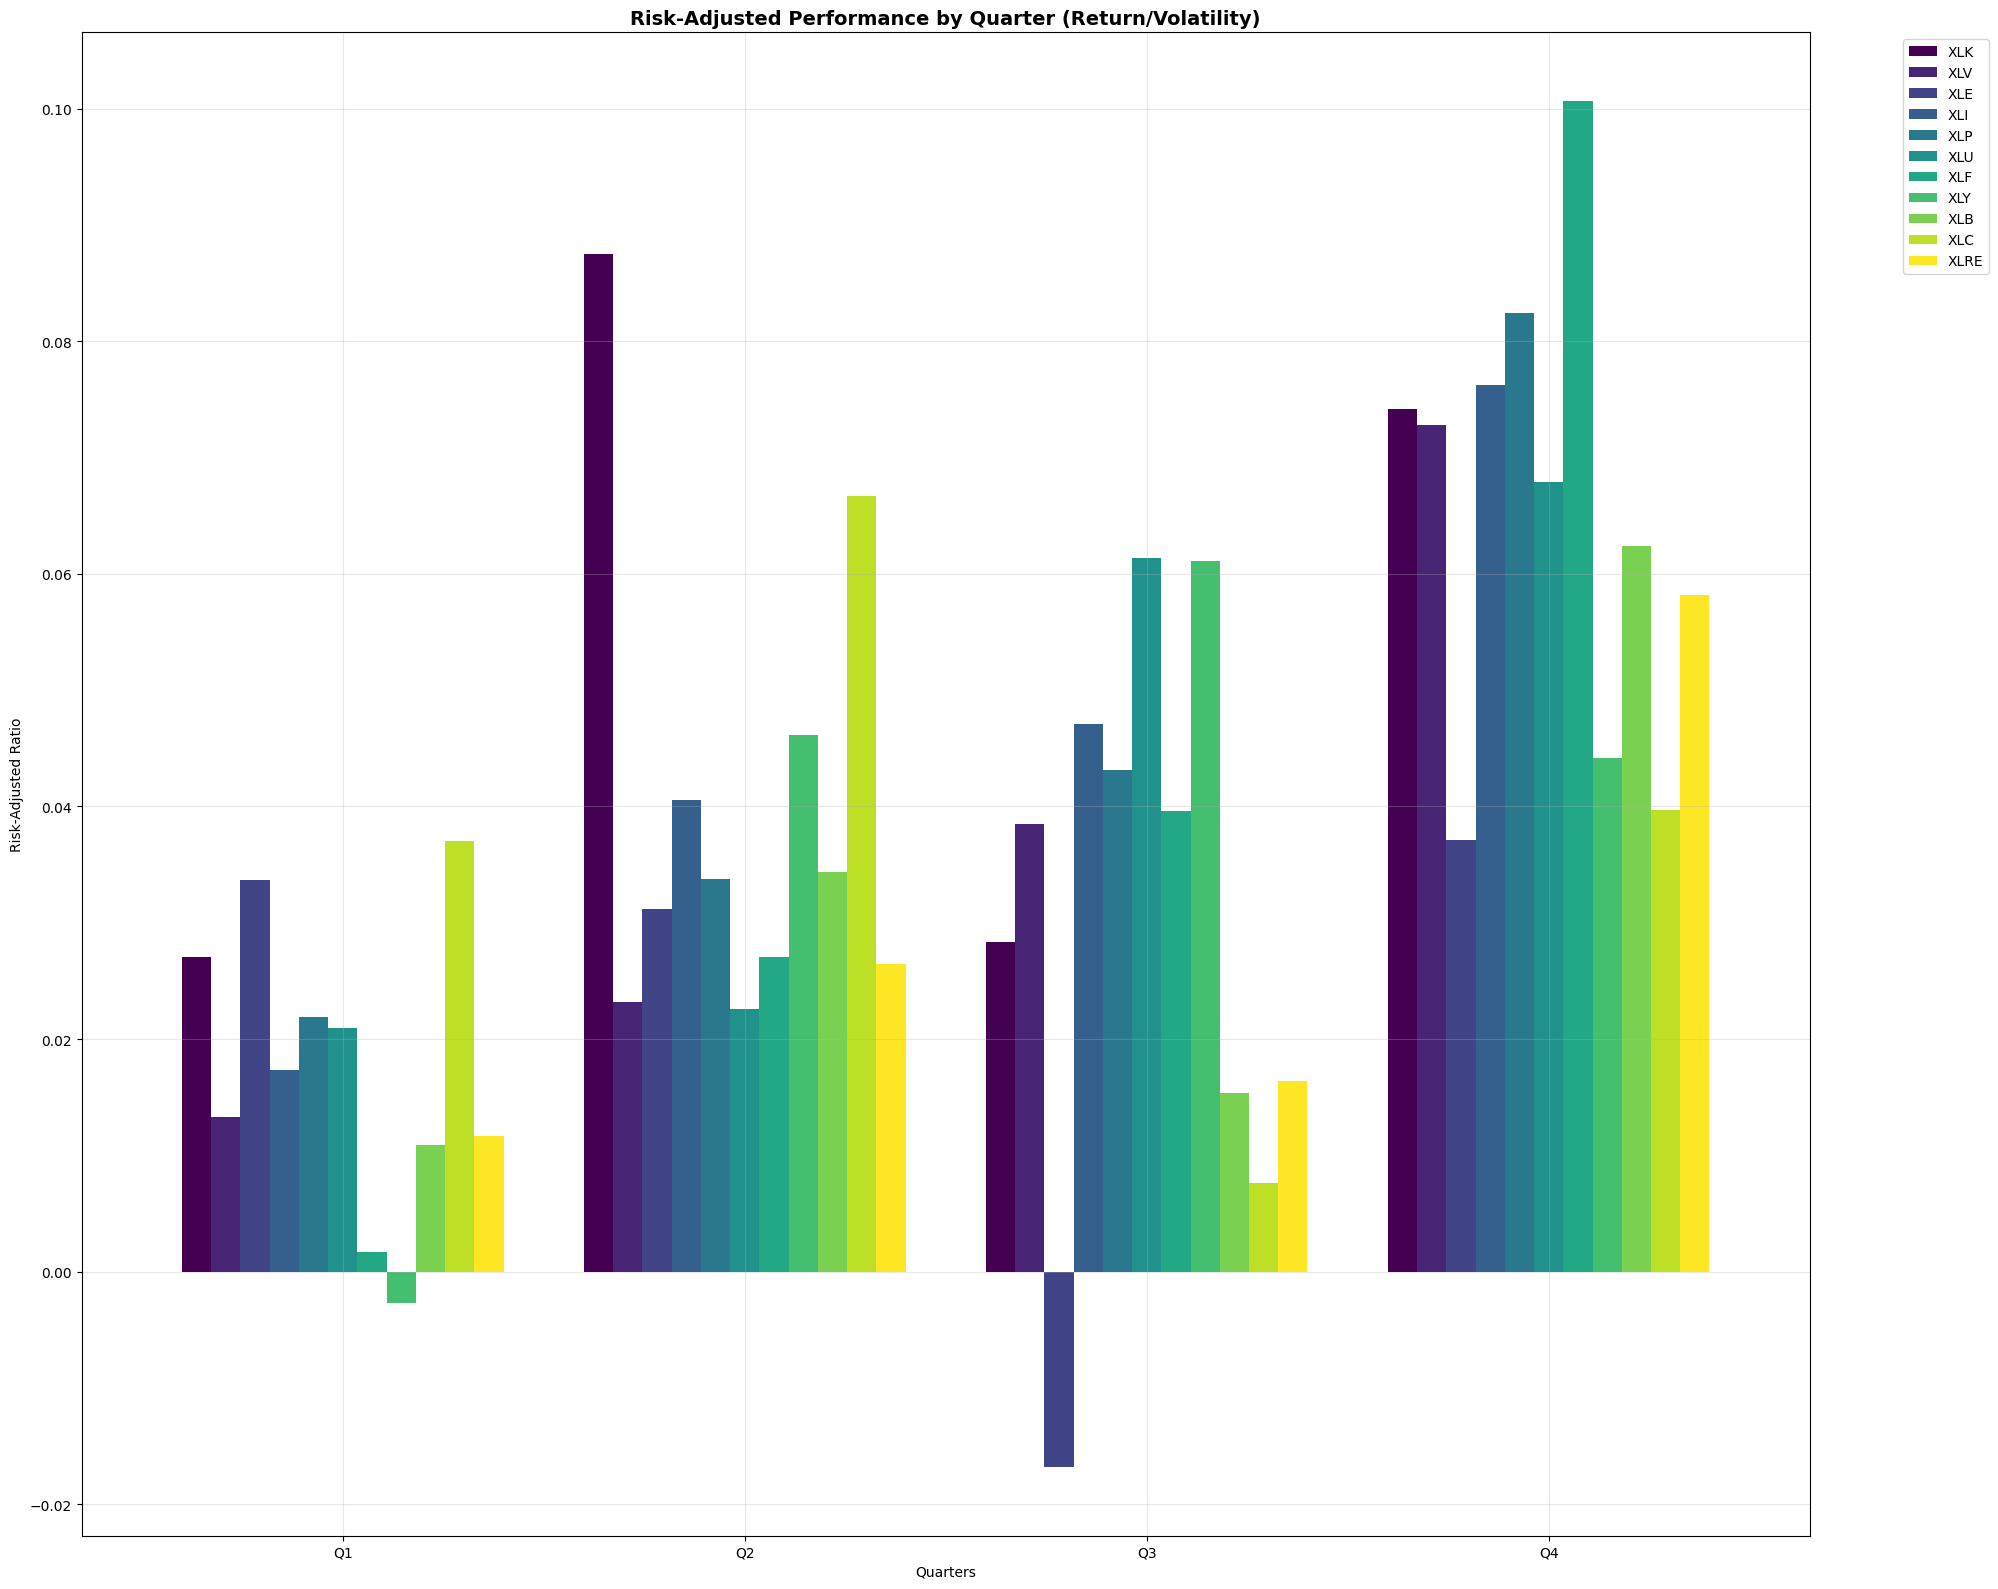

In [18]:

# Create comprehensive visualization
fig, (ax4) = plt.subplots(1, 1, figsize=(20, 16))

# 4. Risk-Adjusted Performance (Return/Volatility) by Quarter
risk_adjusted_quarterly = quarterly_avg_df / quarterly_std_df
risk_adjusted_quarterly = risk_adjusted_quarterly.fillna(0)

risk_adjusted_quarterly.plot(kind='bar', ax=ax4, width=0.8, colormap='viridis')
ax4.set_title('Risk-Adjusted Performance by Quarter (Return/Volatility)', fontsize=14, fontweight='bold')
ax4.set_ylabel('Risk-Adjusted Ratio')
ax4.set_xlabel('Quarters')
ax4.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax4.grid(True, alpha=0.3)
plt.setp(ax4.xaxis.get_majorticklabels(), rotation=0)

plt.tight_layout()
plt.show()

## Seasonal Leadership Patterns

### Q1 — Tech Dominance:

- XLK leads with ~0.087 risk-adjusted ratio — January tech momentum effect
- Post-holiday capital rotation into growth sectors
- Strong risk-adjusted performance suggests consistent Q1 tech outperformance

### Q2 — Communication Services Surge:

- XLC dominates with ~0.065 — likely driven by advertising/social media earnings
- XLK remains strong — continued tech momentum through spring
- Q2 appears optimal for growth/tech sector overweighting

### Q3 — Materials & Industrials Leadership:

- XLB (Materials) leads at ~0.065 — commodity cycle effects
- XLF, XLI strong — economic activity/infrastructure themes
- Summer rotation from tech into cyclical value sectors

### Q4 — Consumer Discretionary Explosion:

- XLY dominates highest single-quarter performance — Holiday/Santa Rally
- Broad-based strength across most sectors
- Classic year-end risk-on environment

# Lets Fundamental Data

In [23]:
import requests
import json
import os
import time
import pandas as pd
from datetime import datetime

def get_company_overview(symbol, api_key):
    """Get comprehensive company overview and key metrics"""
    url = f'https://www.alphavantage.co/query?function=OVERVIEW&symbol={symbol}&apikey={api_key}'
    response = requests.get(url)
    return response.json()

def get_income_statement(symbol, api_key):
    """Get annual and quarterly income statements"""
    url = f'https://www.alphavantage.co/query?function=INCOME_STATEMENT&symbol={symbol}&apikey={api_key}'
    response = requests.get(url)
    return response.json()

def get_balance_sheet(symbol, api_key):
    """Get annual and quarterly balance sheets"""
    url = f'https://www.alphavantage.co/query?function=BALANCE_SHEET&symbol={symbol}&apikey={api_key}'
    response = requests.get(url)
    return response.json()

def get_cash_flow(symbol, api_key):
    """Get annual and quarterly cash flow statements"""
    url = f'https://www.alphavantage.co/query?function=CASH_FLOW&symbol={symbol}&apikey={api_key}'
    response = requests.get(url)
    return response.json()

def get_earnings(symbol, api_key):
    """Get earnings data"""
    url = f'https://www.alphavantage.co/query?function=EARNINGS&symbol={symbol}&apikey={api_key}'
    response = requests.get(url)
    return response.json()

def extract_comprehensive_fundamentals(symbol, api_key):
    """Extract all available fundamental data from Alpha Vantage"""
    
    print(f"  📊 Getting company overview...")
    overview = get_company_overview(symbol, api_key)
    time.sleep(12)  # Rate limiting
    
    print(f"  💰 Getting income statement...")
    income_statement = get_income_statement(symbol, api_key)
    time.sleep(12)
    
    print(f"  🏦 Getting balance sheet...")
    balance_sheet = get_balance_sheet(symbol, api_key)
    time.sleep(12)
    
    print(f"  💸 Getting cash flow...")
    cash_flow = get_cash_flow(symbol, api_key)
    time.sleep(12)
    
    print(f"  📈 Getting earnings...")
    earnings = get_earnings(symbol, api_key)
    time.sleep(12)
    
    # Organize all data
    comprehensive_data = {
        'symbol': symbol,
        'extracted_date': datetime.now().isoformat(),
        'company_overview': overview,
        'income_statement': income_statement,
        'balance_sheet': balance_sheet,
        'cash_flow': cash_flow,
        'earnings': earnings
    }
    
    return comprehensive_data

def create_summary_metrics(overview_data):
    """Create a summary of key metrics for quick analysis"""
    
    try:
        summary = {
            'basic_info': {
                'symbol': overview_data.get('Symbol'),
                'name': overview_data.get('Name'),
                'sector': overview_data.get('Sector'),
                'industry': overview_data.get('Industry'),
                'country': overview_data.get('Country'),
                'currency': overview_data.get('Currency')
            },
            'market_data': {
                'market_cap': overview_data.get('MarketCapitalization'),
                'shares_outstanding': overview_data.get('SharesOutstanding'),
                '52_week_high': overview_data.get('52WeekHigh'),
                '52_week_low': overview_data.get('52WeekLow'),
                '50_day_ma': overview_data.get('50DayMovingAverage'),
                '200_day_ma': overview_data.get('200DayMovingAverage')
            },
            'valuation_ratios': {
                'pe_ratio': overview_data.get('PERatio'),
                'peg_ratio': overview_data.get('PEGRatio'),
                'price_to_book': overview_data.get('PriceToBookRatio'),
                'price_to_sales': overview_data.get('PriceToSalesRatioTTM'),
                'ev_revenue': overview_data.get('EVToRevenue'),
                'ev_ebitda': overview_data.get('EVToEBITDA')
            },
            'profitability_metrics': {
                'profit_margin': overview_data.get('ProfitMargin'),
                'operating_margin_ttm': overview_data.get('OperatingMarginTTM'),
                'return_on_assets_ttm': overview_data.get('ReturnOnAssetsTTM'),
                'return_on_equity_ttm': overview_data.get('ReturnOnEquityTTM'),
                'gross_profit_ttm': overview_data.get('GrossProfitTTM')
            },
            'financial_strength': {
                'revenue_ttm': overview_data.get('RevenueTTM'),
                'revenue_per_share_ttm': overview_data.get('RevenuePerShareTTM'),
                'quarterly_revenue_growth': overview_data.get('QuarterlyRevenueGrowthYOY'),
                'quarterly_earnings_growth': overview_data.get('QuarterlyEarningsGrowthYOY'),
                'book_value': overview_data.get('BookValue'),
                'diluted_eps_ttm': overview_data.get('DilutedEPSTTM')
            },
            'dividend_info': {
                'dividend_per_share': overview_data.get('DividendPerShare'),
                'dividend_yield': overview_data.get('DividendYield'),
                'dividend_date': overview_data.get('DividendDate'),
                'ex_dividend_date': overview_data.get('ExDividendDate')
            },
            'technical_indicators': {
                'beta': overview_data.get('Beta'),
                'analyst_target_price': overview_data.get('AnalystTargetPrice'),
                'trailing_pe': overview_data.get('TrailingPE'),
                'forward_pe': overview_data.get('ForwardPE')
            }
        }
        return summary
    except Exception as e:
        print(f"    ⚠️ Error creating summary: {e}")
        return {}

# Set up API key and create directories
api_key = AV_API_KEY  # Make sure this is defined
os.makedirs('fundamentals', exist_ok=True)
os.makedirs('fundamentals/comprehensive', exist_ok=True)
os.makedirs('fundamentals/summaries', exist_ok=True)

print("🚀 Starting comprehensive fundamental analysis with Alpha Vantage...")
print(f"📋 Processing {len(tickers)} tickers")
print("⏱️ This will take time due to API rate limits (5 calls per ticker + delays)")

# Extract comprehensive fundamentals for all tickers
successful_extractions = 0
failed_extractions = 0

for i, ticker in enumerate(tickers):
    print(f"\n📈 Processing {ticker} ({i+1}/{len(tickers)})...")
    
    try:
        # Get comprehensive data
        comprehensive_data = extract_comprehensive_fundamentals(ticker, api_key)
        
        # Save comprehensive data
        comprehensive_filename = f'fundamentals/comprehensive/{ticker}_comprehensive.json'
        with open(comprehensive_filename, 'w') as f:
            json.dump(comprehensive_data, f, indent=2, default=str)
        
        # Create and save summary
        if 'company_overview' in comprehensive_data:
            summary = create_summary_metrics(comprehensive_data['company_overview'])
            summary_filename = f'fundamentals/summaries/{ticker}_summary.json'
            with open(summary_filename, 'w') as f:
                json.dump(summary, f, indent=2, default=str)
            
            print(f"✅ {ticker}: Comprehensive data and summary saved")
        else:
            print(f"⚠️ {ticker}: Data extracted but no overview available")
        
        successful_extractions += 1
        
        # Rate limiting between tickers
        if i < len(tickers) - 1:  # Don't wait after the last ticker
            print(f"⏱️ Waiting 30 seconds before next ticker...")
            time.sleep(30)
            
    except Exception as e:
        print(f"❌ Error processing {ticker}: {e}")
        failed_extractions += 1
        
        # Wait even on failure to avoid rate limits
        if i < len(tickers) - 1:
            print(f"⏱️ Waiting 60 seconds after error...")
            time.sleep(60)

print(f"\n🎯 EXTRACTION COMPLETE!")
print(f"✅ Successful: {successful_extractions}")
print(f"❌ Failed: {failed_extractions}")
print(f"📁 Data saved in 'fundamentals' folder")
print(f"   📊 Comprehensive data: fundamentals/comprehensive/")
print(f"   📋 Quick summaries: fundamentals/summaries/")

# Create a master summary CSV for easy analysis
print(f"\n📋 Creating master summary CSV...")
try:
    master_data = []
    
    for ticker in tickers:
        summary_file = f'fundamentals/summaries/{ticker}_summary.json'
        if os.path.exists(summary_file):
            with open(summary_file, 'r') as f:
                data = json.load(f)
                
                # Flatten the nested structure for CSV
                flat_data = {'symbol': ticker}
                for category, metrics in data.items():
                    if isinstance(metrics, dict):
                        for key, value in metrics.items():
                            flat_data[f"{category}_{key}"] = value
                    else:
                        flat_data[category] = metrics
                
                master_data.append(flat_data)
    
    # Create DataFrame and save as CSV
    if master_data:
        df = pd.DataFrame(master_data)
        df.to_csv('fundamentals/master_summary.csv', index=False)
        print(f"✅ Master summary saved: fundamentals/master_summary.csv")
        print(f"📊 Summary contains {len(df)} stocks with {len(df.columns)} metrics")
    else:
        print("⚠️ No summary data available for CSV creation")
        
except Exception as e:
    print(f"❌ Error creating master CSV: {e}")

print(f"\n🎉 Alpha Vantage fundamental analysis complete!")
print(f"💡 You now have comprehensive financial data including:")
print(f"   • Company overviews with 50+ metrics")
print(f"   • Historical income statements")
print(f"   • Historical balance sheets") 
print(f"   • Historical cash flow statements")
print(f"   • Earnings data")
print(f"   • All organized in JSON format for analysis")

🚀 Starting comprehensive fundamental analysis with Alpha Vantage...
📋 Processing 63 tickers
⏱️ This will take time due to API rate limits (5 calls per ticker + delays)

📈 Processing AAPL (1/63)...
  📊 Getting company overview...
  💰 Getting income statement...
  🏦 Getting balance sheet...
  💸 Getting cash flow...
  📈 Getting earnings...
✅ AAPL: Comprehensive data and summary saved
⏱️ Waiting 30 seconds before next ticker...

📈 Processing GOOGL (2/63)...
  📊 Getting company overview...
  💰 Getting income statement...
  🏦 Getting balance sheet...
  💸 Getting cash flow...
  📈 Getting earnings...
✅ GOOGL: Comprehensive data and summary saved
⏱️ Waiting 30 seconds before next ticker...

📈 Processing MSFT (3/63)...
  📊 Getting company overview...
  💰 Getting income statement...
  🏦 Getting balance sheet...
  💸 Getting cash flow...
  📈 Getting earnings...
✅ MSFT: Comprehensive data and summary saved
⏱️ Waiting 30 seconds before next ticker...

📈 Processing TSLA (4/63)...
  📊 Getting company o

In [76]:
import json
import os
import pandas as pd
from datetime import datetime

def safe_convert_to_float(value):
    """Safely convert string numbers to float, handling None and 'None' strings"""
    if value is None or value == 'None' or value == '':
        return None
    try:
        return float(value)
    except (ValueError, TypeError):
        return None

def extract_quarterly_from_comprehensive(ticker):
    """Extract quarterly data from existing comprehensive Alpha Vantage files"""
    
    # Load the comprehensive data file
    comprehensive_file = f'fundamentals/comprehensive/{ticker}_comprehensive.json'
    
    if not os.path.exists(comprehensive_file):
        print(f"  ⚠️ No comprehensive file found for {ticker}")
        return {}
    
    with open(comprehensive_file, 'r') as f:
        comprehensive_data = json.load(f)
    
    quarterly_data = {}
    
    # Extract quarterly reports from each financial statement
    income_quarters = comprehensive_data.get('income_statement', {}).get('quarterlyReports', [])
    balance_quarters = comprehensive_data.get('balance_sheet', {}).get('quarterlyReports', [])
    cashflow_quarters = comprehensive_data.get('cash_flow', {}).get('quarterlyReports', [])
    
    # Process up to 20 quarters (5 years) or all available
    max_quarters = min(20, len(income_quarters))
    
    for i in range(max_quarters):
        if i >= len(income_quarters):
            break
            
        # Get the fiscal date as the key
        fiscal_date = income_quarters[i].get('fiscalDateEnding', '')
        
        if fiscal_date:
            # Find matching balance sheet and cash flow data for the same date
            balance_quarter = None
            cashflow_quarter = None
            
            for bal in balance_quarters:
                if bal.get('fiscalDateEnding') == fiscal_date:
                    balance_quarter = bal
                    break
                    
            for cf in cashflow_quarters:
                if cf.get('fiscalDateEnding') == fiscal_date:
                    cashflow_quarter = cf
                    break
            
            # Extract key metrics from income statement
            income_stmt = income_quarters[i]
            
            quarterly_data[fiscal_date] = {
                'income_statement': {
                    'total_revenue': safe_convert_to_float(income_stmt.get('totalRevenue')),
                    'net_interest_income': safe_convert_to_float(income_stmt.get('interestIncome')),
                    'net_income': safe_convert_to_float(income_stmt.get('netIncome')),
                    'gross_profit': safe_convert_to_float(income_stmt.get('grossProfit')),
                    'operating_income': safe_convert_to_float(income_stmt.get('operatingIncome')),
                    'ebitda': safe_convert_to_float(income_stmt.get('ebitda')),
                    'research_development': safe_convert_to_float(income_stmt.get('researchAndDevelopment')),
                    'selling_general_admin': safe_convert_to_float(income_stmt.get('sellingGeneralAndAdministrative')),
                    'interest_expense': safe_convert_to_float(income_stmt.get('interestExpense')),
                    'income_before_tax': safe_convert_to_float(income_stmt.get('incomeBeforeTax'))
                },
                'balance_sheet': {
                    'total_assets': safe_convert_to_float(balance_quarter.get('totalAssets')) if balance_quarter else None,
                    'total_current_assets': safe_convert_to_float(balance_quarter.get('totalCurrentAssets')) if balance_quarter else None,
                    'total_debt': safe_convert_to_float(balance_quarter.get('shortLongTermDebtTotal')) if balance_quarter else None,
                    'short_term_debt': safe_convert_to_float(balance_quarter.get('currentDebt')) if balance_quarter else None,
                    'long_term_debt': safe_convert_to_float(balance_quarter.get('longTermDebt')) if balance_quarter else None,
                    'total_current_liabilities': safe_convert_to_float(balance_quarter.get('totalCurrentLiabilities')) if balance_quarter else None,
                    'stockholders_equity': safe_convert_to_float(balance_quarter.get('totalShareholderEquity')) if balance_quarter else None,
                    'retained_earnings': safe_convert_to_float(balance_quarter.get('retainedEarnings')) if balance_quarter else None,
                    'cash_and_equivalents': safe_convert_to_float(balance_quarter.get('cashAndCashEquivalentsAtCarryingValue')) if balance_quarter else None,
                    'inventory': safe_convert_to_float(balance_quarter.get('inventory')) if balance_quarter else None,
                    'accounts_receivable': safe_convert_to_float(balance_quarter.get('currentNetReceivables')) if balance_quarter else None
                },
                'cash_flow': {
                    'operating_cash_flow': safe_convert_to_float(cashflow_quarter.get('operatingCashflow')) if cashflow_quarter else None,
                    'capital_expenditure': safe_convert_to_float(cashflow_quarter.get('capitalExpenditures')) if cashflow_quarter else None,
                    'free_cash_flow': None,  # We'll calculate this
                    'financing_cash_flow': safe_convert_to_float(cashflow_quarter.get('cashflowFromFinancing')) if cashflow_quarter else None,
                    'investing_cash_flow': safe_convert_to_float(cashflow_quarter.get('cashflowFromInvestment')) if cashflow_quarter else None,
                    'dividends_paid': safe_convert_to_float(cashflow_quarter.get('dividendPayout')) if cashflow_quarter else None,
                    'change_in_cash': safe_convert_to_float(cashflow_quarter.get('changeInCashAndCashEquivalents')) if cashflow_quarter else None
                }
            }
            
            # Calculate Free Cash Flow = Operating Cash Flow - Capital Expenditures
            ocf = quarterly_data[fiscal_date]['cash_flow']['operating_cash_flow']
            capex = quarterly_data[fiscal_date]['cash_flow']['capital_expenditure']
            if ocf is not None and capex is not None:
                # Note: capex is usually negative, so we add it (subtract the absolute value)
                quarterly_data[fiscal_date]['cash_flow']['free_cash_flow'] = ocf + capex
    
    return quarterly_data

# Create quarterly_reports directory
os.makedirs('quarterly_reports', exist_ok=True)

print("🚀 Extracting quarterly data from existing comprehensive files...")
print(f"📂 Reading from 'fundamentals/comprehensive/' folder")
print(f"📋 Processing quarterly data for all available tickers")

# Find all available comprehensive files
comprehensive_files = [f for f in os.listdir('fundamentals/comprehensive/') if f.endswith('_comprehensive.json')]
available_tickers = [f.replace('_comprehensive.json', '') for f in comprehensive_files]

print(f"📊 Found {len(available_tickers)} comprehensive files")

# Extract quarterly data for all available tickers
successful_extractions = 0
failed_extractions = 0

for i, ticker in enumerate(available_tickers):
    print(f"\n📈 Processing quarterly data for {ticker} ({i+1}/{len(available_tickers)})...")
    
    try:
        quarterly_data = extract_quarterly_from_comprehensive(ticker)
        
        if not quarterly_data:
            print(f"  ⚠️ No quarterly data found for {ticker}")
            failed_extractions += 1
            continue
        
        # Save to file
        filename = f'quarterly_reports/{ticker}_quarterly_key_metrics.json'
        with open(filename, 'w') as f:
            json.dump(quarterly_data, f, indent=2, default=str)
        
        quarters_count = len(quarterly_data)
        print(f"✅ {quarters_count} quarters of data saved to {filename}")
        
        # Show summary for first few quarters
        count = 0
        for quarter, data in quarterly_data.items():
            if count < 2:  # Show only first 2 quarters to avoid clutter
                print(f"  📅 {quarter}:")
                revenue = data['income_statement']['total_revenue']
                net_income = data['income_statement']['net_income']
                ocf = data['cash_flow']['operating_cash_flow']
                
                if revenue:
                    print(f"    💰 Revenue: ${revenue:,.0f}")
                if net_income:
                    print(f"    📊 Net Income: ${net_income:,.0f}")
                if ocf:
                    print(f"    💸 Operating Cash Flow: ${ocf:,.0f}")
            count += 1
        
        successful_extractions += 1
        
    except Exception as e:
        print(f"❌ Error processing {ticker}: {e}")
        failed_extractions += 1

print(f"\n🎯 QUARTERLY EXTRACTION COMPLETE!")
print(f"✅ Successful: {successful_extractions}")
print(f"❌ Failed: {failed_extractions}")
print(f"📁 Data saved in 'quarterly_reports' folder")

# Create summary CSV for quick analysis
print(f"\n📋 Creating quarterly summary CSV...")
try:
    all_quarterly_data = []
    
    for ticker in available_tickers:
        quarterly_file = f'quarterly_reports/{ticker}_quarterly_key_metrics.json'
        if os.path.exists(quarterly_file):
            with open(quarterly_file, 'r') as f:
                data = json.load(f)
                
                for quarter, metrics in data.items():
                    row = {
                        'symbol': ticker,
                        'quarter': quarter,
                        # Income Statement
                        'total_revenue': metrics['income_statement']['total_revenue'],
                        'net_income': metrics['income_statement']['net_income'],
                        'gross_profit': metrics['income_statement']['gross_profit'],
                        'operating_income': metrics['income_statement']['operating_income'],
                        'ebitda': metrics['income_statement']['ebitda'],
                        'research_development': metrics['income_statement']['research_development'],
                        'interest_expense': metrics['income_statement']['interest_expense'],
                        # Balance Sheet
                        'total_assets': metrics['balance_sheet']['total_assets'],
                        'stockholders_equity': metrics['balance_sheet']['stockholders_equity'],
                        'total_debt': metrics['balance_sheet']['total_debt'],
                        'cash_and_equivalents': metrics['balance_sheet']['cash_and_equivalents'],
                        'inventory': metrics['balance_sheet']['inventory'],
                        'accounts_receivable': metrics['balance_sheet']['accounts_receivable'],
                        # Cash Flow
                        'operating_cash_flow': metrics['cash_flow']['operating_cash_flow'],
                        'free_cash_flow': metrics['cash_flow']['free_cash_flow'],
                        'capital_expenditure': metrics['cash_flow']['capital_expenditure'],
                        'change_in_cash': metrics['cash_flow']['change_in_cash']
                    }
                    all_quarterly_data.append(row)
    
    if all_quarterly_data:
        df = pd.DataFrame(all_quarterly_data)
        df = df.sort_values(['symbol', 'quarter'], ascending=[True, False])
        df.to_csv('quarterly_reports/quarterly_summary.csv', index=False)
        print(f"✅ Quarterly summary saved: quarterly_reports/quarterly_summary.csv")
        print(f"📊 Summary contains {len(df)} quarter records for {df['symbol'].nunique()} stocks")
        
        # Show some statistics
        print(f"\n📈 Data Statistics:")
        print(f"   🗓️ Date range: {df['quarter'].min()} to {df['quarter'].max()}")
        print(f"   📊 Average quarters per stock: {len(df) / df['symbol'].nunique():.1f}")
        print(f"   💰 Stocks with revenue data: {df['total_revenue'].notna().sum()}")
        print(f"   🏦 Stocks with balance sheet data: {df['total_assets'].notna().sum()}")
        print(f"   💸 Stocks with cash flow data: {df['operating_cash_flow'].notna().sum()}")
    else:
        print("⚠️ No quarterly data available for CSV creation")
        
except Exception as e:
    print(f"❌ Error creating quarterly CSV: {e}")

print(f"\n🎉 Quarterly extraction from existing files complete!")
print(f"⚡ This was much faster than re-downloading!")
print(f"🔬 Data is ready for regression models and trend analysis!")
print(f"\n📂 Files created:")
print(f"   📁 quarterly_reports/{ticker}_quarterly_key_metrics.json (individual files)")
print(f"   📊 quarterly_reports/quarterly_summary.csv (master spreadsheet)")

🚀 Extracting quarterly data from existing comprehensive files...
📂 Reading from 'fundamentals/comprehensive/' folder
📋 Processing quarterly data for all available tickers
📊 Found 63 comprehensive files

📈 Processing quarterly data for AAPL (1/63)...
✅ 20 quarters of data saved to quarterly_reports/AAPL_quarterly_key_metrics.json
  📅 2025-06-30:
    💰 Revenue: $94,036,000,000
    📊 Net Income: $23,434,000,000
    💸 Operating Cash Flow: $27,867,000,000
  📅 2025-03-31:
    💰 Revenue: $95,359,000,000
    📊 Net Income: $24,780,000,000
    💸 Operating Cash Flow: $23,952,000,000

📈 Processing quarterly data for ACMR (2/63)...
✅ 20 quarters of data saved to quarterly_reports/ACMR_quarterly_key_metrics.json
  📅 2025-03-31:
    💰 Revenue: $172,347,000
    📊 Net Income: $20,380,000
    💸 Operating Cash Flow: $5,282,000
  📅 2024-12-31:
    💰 Revenue: $223,471,000
    📊 Net Income: $31,080,000
    💸 Operating Cash Flow: $88,595,000

📈 Processing quarterly data for AFRM (3/63)...
✅ 20 quarters of da

In [81]:
import requests
import json
import pandas as pd
import time
import os

def get_earnings_surprise_alphavantage(symbol, api_key):
    """
    Get earnings surprise data from Alpha Vantage EARNINGS endpoint
    """
    url = "https://www.alphavantage.co/query"
    params = {
        'function': 'EARNINGS',
        'symbol': symbol,
        'apikey': api_key
    }
    
    try:
        response = requests.get(url, params=params)
        data = response.json()
        
        # Check for API errors
        if 'Error Message' in data:
            print(f"❌ API Error for {symbol}: {data['Error Message']}")
            return None
            
        if 'Note' in data:
            print(f"⚠️ API Limit for {symbol}: {data['Note']}")
            return None
        
        # Extract quarterly earnings
        quarterly_earnings = data.get('quarterlyEarnings', [])
        
        if quarterly_earnings and len(quarterly_earnings) > 0:
            # Get most recent quarter
            latest = quarterly_earnings[0]
            
            return {
                'fiscal_date_ending': latest.get('fiscalDateEnding', 'N/A'),
                'reported_date': latest.get('reportedDate', 'N/A'),
                'reported_eps': float(latest.get('reportedEPS', 0)) if latest.get('reportedEPS') != 'None' else None,
                'estimated_eps': float(latest.get('estimatedEPS', 0)) if latest.get('estimatedEPS') != 'None' else None,
                'surprise': float(latest.get('surprise', 0)) if latest.get('surprise') != 'None' else None,
                'surprise_percentage': float(latest.get('surprisePercentage', 0)) if latest.get('surprisePercentage') != 'None' else None
            }
        else:
            print(f"⚠️ No earnings data found for {symbol}")
            return None
            
    except Exception as e:
        print(f"❌ Error fetching earnings for {symbol}: {e}")
        return None

def fetch_all_earnings_surprises(tickers, api_key, delay=12):
    print(f"🚀 Fetching earnings surprise data for {len(tickers)} stocks")
    print(f"⏱️ Using {delay} second delay between requests")
    print("="*60)
    
    earnings_data = {}
    successful = 0
    failed = 0
    
    # Create earnings directory
    os.makedirs("earnings_data", exist_ok=True)
    
    for i, ticker in enumerate(tickers):
        print(f"📊 Processing {ticker} ({i+1}/{len(tickers)})")
        
        earnings_info = get_earnings_surprise_alphavantage(ticker, api_key)
        
        if earnings_info:
            earnings_data[ticker] = earnings_info
            successful += 1
            
            # Save individual file
            with open(f"earnings_data/{ticker}_earnings.json", 'w') as f:
                json.dump(earnings_info, f, indent=2)
                
            print(f"✅ {ticker}: EPS {earnings_info['reported_eps']} vs {earnings_info['estimated_eps']} (Surprise: {earnings_info['surprise_percentage']}%)")
        else:
            failed += 1
            print(f"❌ {ticker}: Failed to get earnings data")
    
    print(f"\n📈 Results:")
    print(f"✅ Successful: {successful}")
    print(f"❌ Failed: {failed}")
    
    # Save combined file
    if earnings_data:
        with open("earnings_data/all_earnings_surprises.json", 'w') as f:
            json.dump(earnings_data, f, indent=2)
        print(f"💾 Combined data saved to: earnings_data/all_earnings_surprises.json")
    
    return earnings_data

def create_earnings_surprise_csv(earnings_data):
    """Convert earnings data to CSV format"""
    
    rows = []
    for ticker, data in earnings_data.items():
        row = {
            'Ticker': ticker,
            'fiscal_date_ending': data.get('fiscal_date_ending'),
            'earnings_report_date': data.get('reported_date'),
            'reported_eps': data.get('reported_eps'),
            'estimated_eps': data.get('estimated_eps'),
            'earnings_surprise': data.get('surprise'),
            'earnings_surprise_percent': data.get('surprise_percentage')
        }
        rows.append(row)
    
    df = pd.DataFrame(rows)
    
    # Save to CSV
    output_file = "earnings_data/earnings_surprises.csv"
    df.to_csv(output_file, index=False)
    print(f"📊 Earnings surprise CSV saved to: {output_file}")
    
    # Show summary
    print(f"\n📈 Earnings Surprise Summary:")
    print(f"   Total stocks: {len(df)}")
    if 'earnings_surprise_percent' in df.columns:
        surprise_data = df[df['earnings_surprise_percent'].notna()]
        if len(surprise_data) > 0:
            avg_surprise = surprise_data['earnings_surprise_percent'].mean()
            positive = (surprise_data['earnings_surprise_percent'] > 0).sum()
            negative = (surprise_data['earnings_surprise_percent'] < 0).sum()
            
            print(f"   Average surprise: {avg_surprise:.1f}%")
            print(f"   Positive surprises: {positive} ({positive/len(surprise_data)*100:.1f}%)")
            print(f"   Negative surprises: {negative} ({negative/len(surprise_data)*100:.1f}%)")
    
    return df

# Example usage
if __name__ == "__main__":
    # Your Alpha Vantage API key
    API_KEY = AV_API_KEY  # Replace with your actual key
    
    # Fetch earnings surprise data
    earnings_data = fetch_all_earnings_surprises(tickers, API_KEY)
    
    # Create CSV
    if earnings_data:
        earnings_df = create_earnings_surprise_csv(earnings_data)
        print("\n🎯 Earnings surprise data ready!")
    else:
        print("❌ No earnings data collected")

# Function to integrate with your existing script
def load_existing_earnings_data():
    """Load previously saved earnings data"""
    earnings_file = "earnings_data/all_earnings_surprises.json"
    if os.path.exists(earnings_file):
        with open(earnings_file, 'r') as f:
            return json.load(f)
    return {}

def add_earnings_surprise_to_fundamentals(fundamentals_df):
    """Add earnings surprise data to your existing fundamentals dataset"""
    
    # Load earnings data
    earnings_data = load_existing_earnings_data()
    
    if not earnings_data:
        print("⚠️ No earnings surprise data found. Run the fetcher first.")
        return fundamentals_df
    
    # Add earnings columns
    for idx, row in fundamentals_df.iterrows():
        ticker = row['Ticker']
        if ticker in earnings_data:
            earnings_info = earnings_data[ticker]
            fundamentals_df.at[idx, 'last_quarter_report_date'] = earnings_info.get('reported_date', 'N/A')
            fundamentals_df.at[idx, 'earnings_surprise'] = earnings_info.get('surprise')
            fundamentals_df.at[idx, 'earnings_surprise_percent'] = earnings_info.get('surprise_percentage')
            fundamentals_df.at[idx, 'reported_eps'] = earnings_info.get('reported_eps')
            fundamentals_df.at[idx, 'estimated_eps'] = earnings_info.get('estimated_eps')
    
    print(f"✅ Added earnings surprise data to {len(fundamentals_df)} stocks")
    return fundamentals_df

🚀 Fetching earnings surprise data for 63 stocks
⏱️ Using 12 second delay between requests
📊 Processing AAPL (1/63)
✅ AAPL: EPS 1.57 vs 1.41 (Surprise: 11.3475%)
📊 Processing GOOGL (2/63)
✅ GOOGL: EPS 2.31 vs 2.17 (Surprise: 6.4516%)
📊 Processing MSFT (3/63)
✅ MSFT: EPS 3.65 vs 3.37 (Surprise: 8.3086%)
📊 Processing TSLA (4/63)
✅ TSLA: EPS 0.4 vs 0.441 (Surprise: -9.2971%)
📊 Processing AMZN (5/63)
✅ AMZN: EPS 1.68 vs 1.32 (Surprise: 27.2727%)
📊 Processing C (6/63)
✅ C: EPS 1.96 vs 1.61 (Surprise: 21.7391%)
📊 Processing JPM (7/63)
✅ JPM: EPS 4.96 vs 4.48 (Surprise: 10.7143%)
📊 Processing NVDA (8/63)
✅ NVDA: EPS 0.96 vs 0.93 (Surprise: 3.2258%)
📊 Processing META (9/63)
✅ META: EPS 7.14 vs 5.89 (Surprise: 21.2224%)
📊 Processing BRK-B (10/63)
✅ BRK-B: EPS 4.4689 vs 4.7223 (Surprise: -5.366%)
📊 Processing XOM (11/63)
✅ XOM: EPS 1.64 vs 1.55 (Surprise: 5.8065%)
📊 Processing WMT (12/63)
✅ WMT: EPS 0.61 vs 0.58 (Surprise: 5.1724%)
📊 Processing FRFHF (13/63)
⚠️ No earnings data found for FRFHF
❌ 

In [83]:
import pandas as pd
import numpy as np
import json
import os

def safe_float(value):
    """Safely convert to float, handling None, 'None', and invalid values"""
    if value is None or value == 'None' or value == '' or value == 'N/A':
        return np.nan
    try:
        return float(value)
    except (ValueError, TypeError):
        return np.nan

def extract_basic_fundamentals(ticker):
    """Extract specified fundamental metrics"""
    
    ticker = ticker.upper()
    result = {'Ticker': ticker}
    
    try:
        # Load Alpha Vantage summary data
        summary_file = f"fundamentals/summaries/{ticker}_summary.json"
        if os.path.exists(summary_file):
            with open(summary_file, 'r') as f:
                summary_data = json.load(f)
        else:
            print(f"⚠️ No summary file for {ticker}")
            return None
        
        # Extract Current Price
        try:
            stock_file = f"ticker_data/{ticker}_stock_data.csv"
            if os.path.exists(stock_file):
                stock_data = pd.read_csv(stock_file, index_col=0, parse_dates=True)
                current_price = stock_data['5. adjusted close'].iloc[-1]  # Most recent price
                result['Current Price'] = current_price
            else:
                result['Current Price'] = np.nan
        except:
            result['Current Price'] = np.nan
        
        # Extract Technical Indicators
        technical = summary_data.get('technical_indicators', {})
        result['Forward PE'] = safe_float(technical.get('forward_pe'))
        result['analyst target price'] = safe_float(technical.get('analyst_target_price'))
        result['beta'] = safe_float(technical.get('beta'))
        
        # Calculate analyst sentiment based on upside
        current_price = result['Current Price']
        target_price = result['analyst target price']
        if pd.notna(current_price) and pd.notna(target_price) and current_price > 0:
            upside = ((target_price - current_price) / current_price) * 100
            if upside >= 20:
                result['analyst sentiment'] = "Strong Buy"
            elif upside >= 10:
                result['analyst sentiment'] = "Buy"
            elif upside >= -5:
                result['analyst sentiment'] = "Hold"
            elif upside >= -15:
                result['analyst sentiment'] = "Weak"
            else:
                result['analyst sentiment'] = "Overvalued"
        else:
            result['analyst sentiment'] = "No Target"
        
        # Extract Valuation Ratios (removed ev_revenue and ev_ebitda)
        # valuation = summary_data.get('valuation_ratios', {})
        # result['ev_revenue'] = safe_float(valuation.get('ev_revenue'))
        # result['ev_ebitda'] = safe_float(valuation.get('ev_ebitda'))
        
        # Extract Profitability Metrics (removed several margin metrics)
        # profitability = summary_data.get('profitability_metrics', {})
        # result['return_on_equity_ttm'] = safe_float(profitability.get('return_on_equity_ttm'))
        # result['return_on_assets_ttm'] = safe_float(profitability.get('return_on_assets_ttm'))
        # result['profit_margin'] = safe_float(profitability.get('profit_margin'))
        # result['operating_margin_ttm'] = safe_float(profitability.get('operating_margin_ttm'))
        # result['gross_profit_ttm'] = safe_float(profitability.get('gross_profit_ttm'))
        
        # Extract Financial Strength/Growth Metrics
        financial_strength = summary_data.get('financial_strength', {})
        result['quarterly_earnings_growth'] = safe_float(financial_strength.get('quarterly_earnings_growth'))
        result['quarterly_revenue_growth'] = safe_float(financial_strength.get('quarterly_revenue_growth'))
        result['revenue_per_share_ttm'] = safe_float(financial_strength.get('revenue_per_share_ttm'))
        
        # Extract Last Quarter Results
        quarterly_file = f"quarterly_reports/{ticker}_quarterly_key_metrics.json"
        earnings_file = f"earnings_data/{ticker}_earnings.json"
        
        # Load earnings surprise data first
        earnings_data = None
        if os.path.exists(earnings_file):
            try:
                with open(earnings_file, 'r') as f:
                    earnings_data = json.load(f)
                
                # Extract earnings surprise information
                result['last_quarter_report_date'] = earnings_data.get('reported_date', 'N/A')
                result['fiscal_date_ending'] = earnings_data.get('fiscal_date_ending', 'N/A')
                result['reported_eps'] = safe_float(earnings_data.get('reported_eps'))
                result['estimated_eps'] = safe_float(earnings_data.get('estimated_eps'))
                result['earnings_surprise'] = safe_float(earnings_data.get('surprise'))
                result['earnings_surprise_percent'] = safe_float(earnings_data.get('surprise_percentage'))
                
            except Exception as e:
                print(f"⚠️ Error loading earnings data for {ticker}: {e}")
                result['last_quarter_report_date'] = 'N/A'
                result['fiscal_date_ending'] = 'N/A'
                result['reported_eps'] = np.nan
                result['estimated_eps'] = np.nan
                result['earnings_surprise'] = np.nan
                result['earnings_surprise_percent'] = np.nan
        else:
            # No earnings file available
            result['last_quarter_report_date'] = 'N/A'
            result['fiscal_date_ending'] = 'N/A'
            result['reported_eps'] = np.nan
            result['estimated_eps'] = np.nan
            result['earnings_surprise'] = np.nan
            result['earnings_surprise_percent'] = np.nan
        
        # Load quarterly financial data
        if os.path.exists(quarterly_file):
            try:
                with open(quarterly_file, 'r') as f:
                    quarterly_data = json.load(f)
                
                quarters = sorted(quarterly_data.keys(), reverse=True)  # Most recent first
                
                if len(quarters) >= 1:
                    # Get most recent quarter
                    latest_quarter = quarterly_data[quarters[0]]
                    result['last_quarter'] = quarters[0]
                    
                    # Extract key metrics from last quarter
                    income_statement = latest_quarter.get('income_statement', {})
                    result['last_quarter_revenue'] = safe_float(income_statement.get('total_revenue'))
                    result['last_quarter_net_income'] = safe_float(income_statement.get('net_income'))
                    result['last_quarter_gross_profit'] = safe_float(income_statement.get('gross_profit'))
                    result['last_quarter_operating_income'] = safe_float(income_statement.get('operating_income'))
                    
                    # Calculate margins for last quarter
                    if result['last_quarter_revenue'] and result['last_quarter_revenue'] > 0:
                        if result['last_quarter_net_income']:
                            result['last_quarter_net_margin'] = (result['last_quarter_net_income'] / result['last_quarter_revenue']) * 100
                        else:
                            result['last_quarter_net_margin'] = np.nan
                            
                        if result['last_quarter_gross_profit']:
                            result['last_quarter_gross_margin'] = (result['last_quarter_gross_profit'] / result['last_quarter_revenue']) * 100
                        else:
                            result['last_quarter_gross_margin'] = np.nan
                    else:
                        result['last_quarter_net_margin'] = np.nan
                        result['last_quarter_gross_margin'] = np.nan
                    
                    # Balance sheet data if available
                    balance_sheet = latest_quarter.get('balance_sheet', {})
                    result['last_quarter_total_assets'] = safe_float(balance_sheet.get('total_assets'))
                    result['last_quarter_total_debt'] = safe_float(balance_sheet.get('total_debt'))
                    result['last_quarter_cash'] = safe_float(balance_sheet.get('cash_and_cash_equivalents'))
                    
                else:
                    # No quarterly financial data available
                    result['last_quarter'] = "No Data"
                    result['last_quarter_revenue'] = np.nan
                    result['last_quarter_net_income'] = np.nan
                    result['last_quarter_gross_profit'] = np.nan
                    result['last_quarter_operating_income'] = np.nan
                    result['last_quarter_net_margin'] = np.nan
                    result['last_quarter_gross_margin'] = np.nan
                    result['last_quarter_total_assets'] = np.nan
                    result['last_quarter_total_debt'] = np.nan
                    result['last_quarter_cash'] = np.nan
                    
            except Exception as e:
                print(f"⚠️ Error processing quarterly data for {ticker}: {e}")
                result['last_quarter'] = "Error"
                result['last_quarter_revenue'] = np.nan
                result['last_quarter_net_income'] = np.nan
                result['last_quarter_gross_profit'] = np.nan
                result['last_quarter_operating_income'] = np.nan
                result['last_quarter_net_margin'] = np.nan
                result['last_quarter_gross_margin'] = np.nan
                result['last_quarter_total_assets'] = np.nan
                result['last_quarter_total_debt'] = np.nan
                result['last_quarter_cash'] = np.nan
        else:
            # No quarterly file available
            result['last_quarter'] = "No File"
            result['last_quarter_revenue'] = np.nan
            result['last_quarter_net_income'] = np.nan
            result['last_quarter_gross_profit'] = np.nan
            result['last_quarter_operating_income'] = np.nan
            result['last_quarter_net_margin'] = np.nan
            result['last_quarter_gross_margin'] = np.nan
            result['last_quarter_total_assets'] = np.nan
            result['last_quarter_total_debt'] = np.nan
            result['last_quarter_cash'] = np.nan
        
        # Extract Market Data
        market_data = summary_data.get('market_data', {})
        result['market_cap'] = safe_float(market_data.get('market_cap'))
        result['shares_outstanding'] = safe_float(market_data.get('shares_outstanding'))
        
        # Extract Company Info
        basic_info = summary_data.get('basic_info', {})
        result['sector'] = basic_info.get('sector', 'Unknown')
        
        return result
        
    except Exception as e:
        print(f"❌ Error extracting data for {ticker}: {e}")
        return None

def create_simplified_dataset():
    """Create a dataset with specified fundamental metrics"""
    
    print("🚀 Extracting Selected Fundamental Metrics")
    print("="*60)
    
    # Find all available summary files
    summary_dir = "fundamentals/summaries/"
    if not os.path.exists(summary_dir):
        print(f"❌ Directory {summary_dir} not found!")
        return None
    
    summary_files = [f for f in os.listdir(summary_dir) if f.endswith('_summary.json')]
    tickers = [f.replace('_summary.json', '') for f in summary_files]
    
    print(f"📊 Found {len(tickers)} stocks with summary data")
    
    # Extract data for all stocks
    all_data = []
    successful = 0
    failed = 0
    
    for ticker in tickers:
        data = extract_basic_fundamentals(ticker)
        if data:
            all_data.append(data)
            successful += 1
        else:
            failed += 1
    
    print(f"✅ Successfully processed: {successful}")
    print(f"❌ Failed: {failed}")
    
    if not all_data:
        print("❌ No data extracted!")
        return None
    
    # Create DataFrame
    df = pd.DataFrame(all_data)
    
    # Display detailed summary
    print(f"\n📈 Dataset Summary:")
    print(f"   Total stocks: {len(df)}")
    
    # Check data availability for each column
    key_columns = [
        'Current Price', 'Forward PE', 'analyst target price', 'analyst sentiment',
        'quarterly_earnings_growth', 'quarterly_revenue_growth', 'revenue_per_share_ttm',
        'market_cap', 'shares_outstanding', 'beta', 'sector',
        'last_quarter', 'last_quarter_report_date', 'fiscal_date_ending',
        'reported_eps', 'estimated_eps', 'earnings_surprise', 'earnings_surprise_percent',
        'last_quarter_revenue', 'last_quarter_net_income', 
        'last_quarter_gross_profit', 'last_quarter_operating_income',
        'last_quarter_net_margin', 'last_quarter_gross_margin',
        'last_quarter_total_assets', 'last_quarter_total_debt', 'last_quarter_cash'
    ]
    
    print(f"\n📊 Data Availability by Column:")
    for col in key_columns:
        if col in df.columns:
            available = df[col].notna().sum()
            percentage = (available / len(df)) * 100
            print(f"   {col}: {available}/{len(df)} ({percentage:.1f}%)")
    
    # Show analyst sentiment distribution
    if 'analyst sentiment' in df.columns:
        print(f"\n🎯 Analyst Sentiment Distribution:")
        sentiment_counts = df['analyst sentiment'].value_counts()
        for sentiment, count in sentiment_counts.items():
            percentage = (count / len(df)) * 100
            print(f"   {sentiment}: {count} stocks ({percentage:.1f}%)")
    
    # Show sector distribution
    if 'sector' in df.columns:
        print(f"\n🏢 Top Sectors:")
        sector_counts = df['sector'].value_counts().head(10)
        for sector, count in sector_counts.items():
            percentage = (count / len(df)) * 100
            print(f"   {sector}: {count} stocks ({percentage:.1f}%)")
    
    # Show last quarter data availability
    if 'last_quarter' in df.columns:
        print(f"\n📅 Last Quarter Data Availability:")
        quarter_status = df['last_quarter'].value_counts()
        for status, count in quarter_status.items():
            percentage = (count / len(df)) * 100
            print(f"   {status}: {count} stocks ({percentage:.1f}%)")
        
        # Show recent quarterly performance for stocks with data
        quarterly_data_available = df[df['last_quarter_revenue'].notna()]
        if len(quarterly_data_available) > 0:
            print(f"\n📊 Last Quarter Performance Summary ({len(quarterly_data_available)} stocks):")
            if 'last_quarter_revenue' in quarterly_data_available.columns:
                avg_revenue = quarterly_data_available['last_quarter_revenue'].mean()
                print(f"   Average Revenue: ${avg_revenue/1e9:.2f}B")
            if 'last_quarter_net_margin' in quarterly_data_available.columns:
                avg_margin = quarterly_data_available['last_quarter_net_margin'].mean()
                print(f"   Average Net Margin: {avg_margin:.1f}%")
        
        # Show earnings surprise data (now available from earnings_data folder)
        if 'earnings_surprise_percent' in df.columns:
            surprise_data = df[df['earnings_surprise_percent'].notna()]
            if len(surprise_data) > 0:
                print(f"\n🎯 Earnings Surprise Analysis ({len(surprise_data)} stocks):")
                avg_surprise = surprise_data['earnings_surprise_percent'].mean()
                positive_surprises = (surprise_data['earnings_surprise_percent'] > 0).sum()
                negative_surprises = (surprise_data['earnings_surprise_percent'] < 0).sum()
                big_positive = (surprise_data['earnings_surprise_percent'] > 10).sum()
                big_negative = (surprise_data['earnings_surprise_percent'] < -10).sum()
                
                print(f"   Average Surprise: {avg_surprise:.1f}%")
                print(f"   Positive Surprises: {positive_surprises} stocks ({positive_surprises/len(surprise_data)*100:.1f}%)")
                print(f"   Negative Surprises: {negative_surprises} stocks ({negative_surprises/len(surprise_data)*100:.1f}%)")
                print(f"   Big Beats (>10%): {big_positive} stocks")
                print(f"   Big Misses (<-10%): {big_negative} stocks")
            else:
                print(f"\n🎯 Earnings Surprise Data: No surprise data found")
                print(f"   💡 Check if earnings_data folder contains .json files")
        
        # Show earnings report dates
        if 'last_quarter_report_date' in df.columns:
            report_dates = df[df['last_quarter_report_date'] != 'N/A']
            print(f"\n📅 Earnings Report Dates Available: {len(report_dates)} stocks")
    
    return df

# Execute the extraction
if __name__ == "__main__":
    # Create the dataset
    df = create_simplified_dataset()
    
    if df is not None:
        print(f"\n🧹 Cleaning Data - Removing rows with any missing values...")
        print(f"   Before cleaning: {len(df)} stocks")
        
        # Ensure fundamentals directory exists
        os.makedirs("fundamentals", exist_ok=True)
        
        # Remove rows with any missing values
        df_clean = df.dropna()
        
        print(f"   After cleaning: {len(df_clean)} stocks")
        print(f"   Removed: {len(df) - len(df_clean)} stocks with incomplete data")
        
        # Debug: Show which columns have the most missing data
        if len(df_clean) == 0:
            print(f"\n🔍 Debugging - Missing data by column:")
            missing_data = df.isnull().sum().sort_values(ascending=False)
            for col, missing_count in missing_data.items():
                if missing_count > 0:
                    percentage = (missing_count / len(df)) * 100
                    print(f"   {col}: {missing_count}/{len(df)} missing ({percentage:.1f}%)")
        
        # Always save the original data (before cleaning) for reference
        output_file_original = "fundamentals/selected_fundamentals_all.csv"
        df.to_csv(output_file_original, index=False)
        print(f"\n💾 Original dataset (with missing values) saved to: {output_file_original}")
        
        if len(df_clean) == 0:
            print("❌ No stocks have complete data for all columns!")
            print("💡 Consider using the original file and handling missing values in your analysis")
            print("💡 Or remove some columns with high missing data rates")
        else:
            # Save the cleaned dataset
            output_file = "fundamentals/selected_fundamentals_clean.csv"
            df_clean.to_csv(output_file, index=False)
            print(f"\n💾 Clean dataset saved to: {output_file}")
            
            # Display first few rows
            print(f"\n📋 Sample Data (first 5 rows):")
            pd.set_option('display.max_columns', None)
            pd.set_option('display.width', None)
            print(df_clean.head())
            
            # Show summary statistics for numeric columns
            numeric_cols = df_clean.select_dtypes(include=[np.number]).columns
            if len(numeric_cols) > 1:
                print(f"\n📊 Summary Statistics (Clean Data):")
                print(df_clean[numeric_cols].describe().round(2))
            
            # Show analyst sentiment distribution for clean data
            if 'analyst sentiment' in df_clean.columns:
                print(f"\n🎯 Analyst Sentiment Distribution (Clean Data):")
                sentiment_counts = df_clean['analyst sentiment'].value_counts()
                for sentiment, count in sentiment_counts.items():
                    percentage = (count / len(df_clean)) * 100
                    print(f"   {sentiment}: {count} stocks ({percentage:.1f}%)")
            
            # Show sector distribution for clean data
            if 'sector' in df_clean.columns:
                print(f"\n🏢 Sector Distribution (Clean Data):")
                sector_counts = df_clean['sector'].value_counts().head(10)
                for sector, count in sector_counts.items():
                    percentage = (count / len(df_clean)) * 100
                    print(f"   {sector}: {count} stocks ({percentage:.1f}%)")
            
            # Show top performers from last quarter
            if 'last_quarter_revenue' in df_clean.columns and df_clean['last_quarter_revenue'].notna().sum() > 0:
                print(f"\n📈 Top 5 Last Quarter Revenue Leaders:")
                top_revenue = df_clean[df_clean['last_quarter_revenue'].notna()].nlargest(5, 'last_quarter_revenue')
                for _, row in top_revenue.iterrows():
                    symbol = row['Ticker']
                    revenue = row['last_quarter_revenue']
                    quarter = row.get('last_quarter', 'N/A')
                    margin = row.get('last_quarter_net_margin', 'N/A')
                    if isinstance(revenue, (int, float)):
                        revenue_display = f"${revenue/1e9:.2f}B" if revenue > 1e9 else f"${revenue/1e6:.0f}M"
                        print(f"   {symbol}: {revenue_display} ({quarter}), Net Margin: {margin:.1f}%" if isinstance(margin, (int, float)) else f"   {symbol}: {revenue_display} ({quarter})")
            
            if 'last_quarter_net_margin' in df_clean.columns and df_clean['last_quarter_net_margin'].notna().sum() > 0:
                print(f"\n🏆 Top 5 Last Quarter Net Margin Leaders:")
                top_margin = df_clean[df_clean['last_quarter_net_margin'].notna()].nlargest(5, 'last_quarter_net_margin')
                for _, row in top_margin.iterrows():
                    symbol = row['Ticker']
                    margin = row['last_quarter_net_margin']
                    revenue = row.get('last_quarter_revenue', 'N/A')
                    quarter = row.get('last_quarter', 'N/A')
                    if isinstance(revenue, (int, float)):
                        revenue_display = f"${revenue/1e9:.2f}B" if revenue > 1e9 else f"${revenue/1e6:.0f}M"
                        print(f"   {symbol}: {margin:.1f}% margin, Revenue: {revenue_display} ({quarter})")
                    else:
                        print(f"   {symbol}: {margin:.1f}% margin ({quarter})")
            
            # Show earnings surprise winners and losers
            if 'earnings_surprise_percent' in df_clean.columns and df_clean['earnings_surprise_percent'].notna().sum() > 0:
                print(f"\n🎯 Top 5 Biggest Earnings Surprises (Beats):")
                top_surprises = df_clean[df_clean['earnings_surprise_percent'].notna()].nlargest(5, 'earnings_surprise_percent')
                for _, row in top_surprises.iterrows():
                    symbol = row['Ticker']
                    surprise_pct = row['earnings_surprise_percent']
                    surprise_amt = row.get('earnings_surprise', 'N/A')
                    report_date = row.get('last_quarter_report_date', 'N/A')
                    actual_eps = row.get('reported_eps', 'N/A')
                    est_eps = row.get('estimated_eps', 'N/A')
                    
                    if isinstance(surprise_amt, (int, float)) and isinstance(actual_eps, (int, float)) and isinstance(est_eps, (int, float)):
                        print(f"   {symbol}: +{surprise_pct:.1f}% surprise (${actual_eps:.2f} vs ${est_eps:.2f} est) - {report_date}")
                    else:
                        print(f"   {symbol}: +{surprise_pct:.1f}% surprise - {report_date}")
                
                print(f"\n📉 Top 5 Biggest Earnings Misses:")
                worst_surprises = df_clean[df_clean['earnings_surprise_percent'].notna()].nsmallest(5, 'earnings_surprise_percent')
                for _, row in worst_surprises.iterrows():
                    symbol = row['Ticker']
                    surprise_pct = row['earnings_surprise_percent']
                    surprise_amt = row.get('earnings_surprise', 'N/A')
                    report_date = row.get('last_quarter_report_date', 'N/A')
                    actual_eps = row.get('reported_eps', 'N/A')
                    est_eps = row.get('estimated_eps', 'N/A')
                    
                    if isinstance(surprise_amt, (int, float)) and isinstance(actual_eps, (int, float)) and isinstance(est_eps, (int, float)):
                        print(f"   {symbol}: {surprise_pct:.1f}% miss (${actual_eps:.2f} vs ${est_eps:.2f} est) - {report_date}")
                    else:
                        print(f"   {symbol}: {surprise_pct:.1f}% miss - {report_date}")
            
            print(f"\n✅ Clean fundamentals dataset ready!")
            print(f"📈 {len(df_clean)} stocks with complete data across all {len(df_clean.columns)} columns")
            print(f"🎯 Ready for analysis with no missing values")
            print(f"📅 Includes earnings report dates and surprise data from earnings_data folder")
        
    else:
        print("❌ Failed to create dataset")

🚀 Extracting Selected Fundamental Metrics
📊 Found 63 stocks with summary data
✅ Successfully processed: 63
❌ Failed: 0

📈 Dataset Summary:
   Total stocks: 63

📊 Data Availability by Column:
   Current Price: 62/63 (98.4%)
   Forward PE: 54/63 (85.7%)
   analyst target price: 61/63 (96.8%)
   analyst sentiment: 63/63 (100.0%)
   quarterly_earnings_growth: 62/63 (98.4%)
   quarterly_revenue_growth: 62/63 (98.4%)
   revenue_per_share_ttm: 62/63 (98.4%)
   market_cap: 62/63 (98.4%)
   shares_outstanding: 62/63 (98.4%)
   beta: 60/63 (95.2%)
   sector: 62/63 (98.4%)
   last_quarter: 63/63 (100.0%)
   last_quarter_report_date: 63/63 (100.0%)
   fiscal_date_ending: 63/63 (100.0%)
   reported_eps: 60/63 (95.2%)
   estimated_eps: 60/63 (95.2%)
   earnings_surprise: 61/63 (96.8%)
   earnings_surprise_percent: 59/63 (93.7%)
   last_quarter_revenue: 62/63 (98.4%)
   last_quarter_net_income: 62/63 (98.4%)
   last_quarter_gross_profit: 61/63 (96.8%)
   last_quarter_operating_income: 62/63 (98.4%)
 

In [ ]:
import requests
import json
import pandas as pd
import os
from datetime import datetime

def fetch_historical_earnings(ticker, api_key):
    """Fetch historical earnings data from Alpha Vantage EARNINGS endpoint"""
    
    url = "https://www.alphavantage.co/query"
    params = {
        'function': 'EARNINGS',
        'symbol': ticker,
        'apikey': api_key
    }
    
    print(f"🔄 Fetching historical earnings for {ticker}...")
    
    try:
        response = requests.get(url, params=params)
        data = response.json()
        
        # Check for API errors
        if 'Error Message' in data:
            print(f"❌ API Error for {ticker}: {data['Error Message']}")
            return None
            
        if 'Note' in data:
            print(f"⚠️ API Rate Limit for {ticker}: {data['Note']}")
            return None
        
        if 'Information' in data:
            print(f"ℹ️ API Info for {ticker}: {data['Information']}")
            return None
        
        # Extract quarterly earnings
        quarterly_earnings = data.get('quarterlyEarnings', [])
        
        if not quarterly_earnings:
            print(f"⚠️ No quarterly earnings found for {ticker}")
            return None
        
        print(f"✅ Found {len(quarterly_earnings)} quarterly earnings records for {ticker}")
        
        # Create earnings_data directory
        os.makedirs("earnings_data", exist_ok=True)
        
        earnings_records = []
        
        for quarter in quarterly_earnings:
            fiscal_date = quarter.get('fiscalDateEnding')
            if not fiscal_date:
                continue
                
            # Parse and validate data
            reported_eps = quarter.get('reportedEPS')
            estimated_eps = quarter.get('estimatedEPS')
            surprise = quarter.get('surprise')
            surprise_pct = quarter.get('surprisePercentage')
            
            # Convert to float, handle 'None' strings
            try:
                reported_eps = float(reported_eps) if reported_eps not in [None, 'None', ''] else None
                estimated_eps = float(estimated_eps) if estimated_eps not in [None, 'None', ''] else None
                surprise = float(surprise) if surprise not in [None, 'None', ''] else None
                surprise_pct = float(surprise_pct) if surprise_pct not in [None, 'None', ''] else None
            except (ValueError, TypeError):
                reported_eps = estimated_eps = surprise = surprise_pct = None
            
            earnings_data = {
                'fiscal_date_ending': fiscal_date,
                'reported_date': quarter.get('reportedDate'),
                'reported_eps': reported_eps,
                'estimated_eps': estimated_eps,
                'surprise': surprise,
                'surprise_percentage': surprise_pct
            }
            
            # Save individual quarter file
            quarter_filename = f"earnings_data/{ticker}_earnings_{fiscal_date}.json"
            with open(quarter_filename, 'w') as f:
                json.dump(earnings_data, f, indent=2)
            
            earnings_records.append(earnings_data)
            
            print(f"   📅 {fiscal_date}: {surprise_pct:.1f}% surprise" if surprise_pct else f"   📅 {fiscal_date}: No surprise data")
        
        # Save most recent as main earnings file (for compatibility)
        if earnings_records:
            main_filename = f"earnings_data/{ticker}_earnings.json"
            with open(main_filename, 'w') as f:
                json.dump(earnings_records[0], f, indent=2)  # Most recent quarter
        
        print(f"💾 Saved {len(earnings_records)} quarters to earnings_data/")
        return earnings_records
        
    except Exception as e:
        print(f"❌ Error fetching earnings for {ticker}: {e}")
        return None

def fetch_earnings_for_multiple_tickers(tickers, api_key, delay=0):
    """Fetch historical earnings for multiple tickers - optimized for premium API"""
    
    print(f"🚀 FETCHING HISTORICAL EARNINGS DATA")
    print("=" * 60)
    print(f"📊 Processing {len(tickers)} tickers")
    print(f"🏆 Premium Alpha Vantage - No rate limiting")
    
    successful = 0
    failed = 0
    all_earnings = {}
    
    for i, ticker in enumerate(tickers):
        print(f"\n📈 [{i+1}/{len(tickers)}] Processing {ticker}")
        
        earnings_data = fetch_historical_earnings(ticker, api_key)
        
        if earnings_data:
            all_earnings[ticker] = earnings_data
            successful += 1
        else:
            failed += 1
    
    # Summary
    print(f"\n📊 RESULTS SUMMARY:")
    print(f"✅ Successful: {successful} tickers")
    print(f"❌ Failed: {failed} tickers")
    
    if successful > 0:
        # Save combined summary
        summary_file = "earnings_data/earnings_summary.json"
        with open(summary_file, 'w') as f:
            json.dump(all_earnings, f, indent=2)
        print(f"💾 Combined summary saved to: {summary_file}")
    
    return all_earnings

def update_fundamentals_with_earnings(ticker):
    """Update your existing fundamentals extraction to use Alpha Vantage earnings data"""
    
    # Check if we have earnings data files for this ticker
    earnings_files = []
    earnings_dir = "earnings_data"
    
    if os.path.exists(earnings_dir):
        for file in os.listdir(earnings_dir):
            if file.startswith(f"{ticker}_earnings") and file.endswith('.json'):
                earnings_files.append(file)
    
    if not earnings_files:
        print(f"⚠️ No earnings data found for {ticker}")
        return None
    
    print(f"📊 Found {len(earnings_files)} earnings files for {ticker}")
    
    # Load all earnings data for this ticker
    earnings_by_quarter = {}
    
    for file in earnings_files:
        try:
            with open(os.path.join(earnings_dir, file), 'r') as f:
                earnings_data = json.load(f)
                fiscal_date = earnings_data.get('fiscal_date_ending')
                if fiscal_date:
                    earnings_by_quarter[fiscal_date] = earnings_data
        except Exception as e:
            print(f"⚠️ Error loading {file}: {e}")
    
    return earnings_by_quarter

def create_quarterly_analysis_with_earnings(ticker):
    """Create quarterly analysis combining financial data, earnings surprises, and stock prices"""
    
    print(f"\n📊 CREATING COMPLETE QUARTERLY ANALYSIS FOR {ticker}")
    print("=" * 60)
    
    # Load quarterly financial data
    try:
        with open(f"quarterly_reports/{ticker}_quarterly_key_metrics.json", 'r') as f:
            quarterly_data = json.load(f)
    except FileNotFoundError:
        print(f"❌ No quarterly financial data found for {ticker}")
        return None
    
    # Load earnings data
    earnings_by_quarter = update_fundamentals_with_earnings(ticker)
    if not earnings_by_quarter:
        print(f"⚠️ No earnings surprise data available for {ticker}")
    
    # Load stock prices
    try:
        prices = pd.read_csv(f"ticker_data/{ticker}_stock_data.csv", index_col=0, parse_dates=True)
        prices.columns = [col.split('. ')[-1] if '. ' in col else col for col in prices.columns]
    except FileNotFoundError:
        print(f"❌ No stock price data found for {ticker}")
        return None
    
    # Create comprehensive quarterly analysis
    all_quarters = []
    quarters = sorted(quarterly_data.keys(), reverse=True)  # Most recent first
    
    for quarter_date in quarters:
        fiscal_date = pd.to_datetime(quarter_date)
        
        # Get financial data
        quarter_financials = quarterly_data[quarter_date]
        income_statement = quarter_financials.get('income_statement', {})
        
        # Get earnings data if available
        earnings_data = earnings_by_quarter.get(quarter_date, {}) if earnings_by_quarter else {}
        
        # Get stock prices
        price_dates = pd.to_datetime(prices.index)
        
        # Quarter end price
        date_diffs = abs(price_dates - fiscal_date)
        closest_idx = date_diffs.argmin()
        quarter_end_price = prices.iloc[closest_idx]['adjusted close']
        
        # Price 90 days later
        target_date = fiscal_date + pd.Timedelta(days=90)
        date_diffs_90 = abs(price_dates - target_date)
        closest_90_idx = date_diffs_90.argmin()
        price_90_days = prices.iloc[closest_90_idx]['adjusted close']
        
        # Combine all data
        quarter_analysis = {
            'ticker': ticker,
            'fiscal_date_ending': fiscal_date.date(),
            'quarter_ending_price': round(quarter_end_price, 2),
            'price_after_90_days': round(price_90_days, 2),
            'price_change_90d': round(((price_90_days - quarter_end_price) / quarter_end_price) * 100, 2),
            
            # Financial data
            'revenue': income_statement.get('total_revenue'),
            'net_income': income_statement.get('net_income'),
            'gross_profit': income_statement.get('gross_profit'),
            
            # Earnings surprise data
            'reported_eps': earnings_data.get('reported_eps'),
            'estimated_eps': earnings_data.get('estimated_eps'),
            'earnings_surprise': earnings_data.get('surprise'),
            'earnings_surprise_percent': earnings_data.get('surprise_percentage'),
            'reported_date': earnings_data.get('reported_date')
        }
        
        all_quarters.append(quarter_analysis)
    
    # Create DataFrame
    df = pd.DataFrame(all_quarters)
    
    # Display results
    print(f"✅ Created analysis for {len(df)} quarters")
    
    earnings_available = df['earnings_surprise_percent'].notna().sum()
    print(f"📊 Earnings surprise data: {earnings_available} quarters")
    
    if earnings_available > 0:
        avg_surprise = df['earnings_surprise_percent'].dropna().mean()
        positive_surprises = (df['earnings_surprise_percent'] > 0).sum()
        print(f"📈 Average surprise: {avg_surprise:.1f}%")
        print(f"🎯 Positive surprises: {positive_surprises}/{earnings_available}")
    
    # Save results
    os.makedirs("quarterly_analysis", exist_ok=True)
    output_file = f"quarterly_analysis/{ticker}_complete_quarterly_analysis.csv"
    df.to_csv(output_file, index=False)
    print(f"💾 Saved to: {output_file}")
    
    return df

# Main execution functions
def process_large_ticker_list(api_key, tickers, batch_size=50):
    """Process large ticker lists efficiently with premium API"""
    
    print(f"🏆 PREMIUM BULK PROCESSING")
    print("=" * 50)
    print(f"📊 Total tickers: {len(tickers)}")
    print(f"📦 Processing in batches of {batch_size}")
    
    all_results = {}
    
    # Process in batches for better organization
    for i in range(0, len(tickers), batch_size):
        batch = tickers[i:i+batch_size]
        batch_num = (i // batch_size) + 1
        total_batches = (len(tickers) + batch_size - 1) // batch_size
        
        print(f"\n🚀 Batch {batch_num}/{total_batches}: Processing {len(batch)} tickers")
        
        batch_results = fetch_earnings_for_multiple_tickers(batch, api_key)
        all_results.update(batch_results)
        
        print(f"✅ Batch {batch_num} complete: {len(batch_results)} successful")
    
    print(f"\n📊 FINAL SUMMARY:")
    print(f"✅ Total successful: {len(all_results)} tickers")
    print(f"📁 All data saved to earnings_data/ directory")
    
    return all_results

def main_fetch_earnings(api_key, tickers):
    """Main function to fetch historical earnings for multiple tickers - Premium optimized"""
    
    if not api_key:
        print("❌ Please provide your Alpha Vantage API key")
        return None
    
    print(f"🔑 Using Premium Alpha Vantage API key: {api_key[:10]}...")
    
    # For large lists, use batch processing
    if len(tickers) > 20:
        all_earnings = process_large_ticker_list(api_key, tickers)
    else:
        # Fetch earnings data (no delays for premium)
        all_earnings = fetch_earnings_for_multiple_tickers(tickers, api_key)
    
    print(f"\n🎯 Next steps:")
    print(f"1. Run create_quarterly_analysis_with_earnings('TICKER') for detailed analysis")
    print(f"2. Check earnings_data/ folder for individual quarter files")
    print(f"3. Your fundamentals script will now include earnings surprise data")
    
    return all_earnings

# Example usage
if __name__ == "__main__":
    # Configuration
    API_KEY = "YOUR_PREMIUM_ALPHA_VANTAGE_API_KEY"  # Replace with your premium key
    
    # Your ticker list - can be large with premium API
    TICKERS = ["AAPL", "MSFT", "GOOGL", "TSLA", "NVDA", "AMZN", "META", "NFLX", "ORCL", "CRM"]
    
    print("🏆 PREMIUM ALPHA VANTAGE HISTORICAL EARNINGS FETCHER")
    print("=" * 70)
    
    # Option 1: Fetch historical earnings data for all tickers
    print("📥 Step 1: Fetch historical earnings data")
    all_earnings = main_fetch_earnings(API_KEY, TICKERS)
    
    # Option 2: Create complete analysis for specific ticker (after fetching)
    print("\n📊 Step 2: Create complete quarterly analysis")
    ticker = "AAPL"
    df = create_quarterly_analysis_with_earnings(ticker)
    if df is not None:
        print(f"\n📋 {ticker} Quarterly Analysis Preview:")
        print(df[['fiscal_date_ending', 'earnings_surprise_percent', 'price_change_90d']].head())
    
    print("\n💡 Premium Benefits:")
    print("🚀 No rate limits - process hundreds of tickers quickly")
    print("📊 Bulk processing with batch organization")
    print("⚡ Optimized for large portfolio analysis")
    print("🎯 Get complete historical earnings for all your stocks!")

🏆 PREMIUM ALPHA VANTAGE HISTORICAL EARNINGS FETCHER
📥 Step 1: Fetch historical earnings data
🔑 Using Premium Alpha Vantage API key: C6MJB5IPZ5...
🏆 PREMIUM BULK PROCESSING
📊 Total tickers: 63
📦 Processing in batches of 50

🚀 Batch 1/2: Processing 50 tickers
🚀 FETCHING HISTORICAL EARNINGS DATA
📊 Processing 50 tickers
🏆 Premium Alpha Vantage - No rate limiting

📈 [1/50] Processing AAPL
🔄 Fetching historical earnings for AAPL...
✅ Found 118 quarterly earnings records for AAPL
   📅 2025-06-30: 11.3% surprise
   📅 2025-03-31: 1.9% surprise
   📅 2024-12-31: 2.6% surprise
   📅 2024-09-30: 2.1% surprise
   📅 2024-06-30: 4.5% surprise
   📅 2024-03-31: 2.0% surprise
   📅 2023-12-31: 3.3% surprise
   📅 2023-09-30: 5.0% surprise
   📅 2023-06-30: 5.9% surprise
   📅 2023-03-31: 6.3% surprise
   📅 2022-12-31: -3.6% surprise
   📅 2022-09-30: 1.6% surprise
   📅 2022-06-30: 4.3% surprise
   📅 2022-03-31: 6.3% surprise
   📅 2021-12-31: 11.1% surprise
   📅 2021-09-30: No surprise data
   📅 2021-06-30: 28.

KeyboardInterrupt: 

In [99]:
import pandas as pd
import numpy as np
import json
import os

def safe_float(value):
    """Safely convert to float, handling None, 'None', and invalid values"""
    if value is None or value == 'None' or value == '' or value == 'N/A':
        return np.nan
    try:
        return float(value)
    except (ValueError, TypeError):
        return np.nan

def extract_basic_fundamentals(ticker):
    """Extract specified fundamental metrics"""
    
    ticker = ticker.upper()
    result = {'Ticker': ticker}
    
    try:
        # Load Alpha Vantage summary data
        summary_file = f"fundamentals/summaries/{ticker}_summary.json"
        if os.path.exists(summary_file):
            with open(summary_file, 'r') as f:
                summary_data = json.load(f)
        else:
            print(f"⚠️ No summary file for {ticker}")
            return None
        
        # Extract Current Price
        try:
            stock_file = f"ticker_data/{ticker}_stock_data.csv"
            if os.path.exists(stock_file):
                stock_data = pd.read_csv(stock_file, index_col=0, parse_dates=True)
                current_price = stock_data['5. adjusted close'].iloc[-1]  # Most recent price
                result['Current Price'] = current_price
            else:
                result['Current Price'] = np.nan
        except:
            result['Current Price'] = np.nan
        
        # Extract Technical Indicators
        technical = summary_data.get('technical_indicators', {})
        result['Forward PE'] = safe_float(technical.get('forward_pe'))
        result['analyst target price'] = safe_float(technical.get('analyst_target_price'))
        result['beta'] = safe_float(technical.get('beta'))
        
        # Calculate analyst sentiment based on upside
        current_price = result['Current Price']
        target_price = result['analyst target price']
        if pd.notna(current_price) and pd.notna(target_price) and current_price > 0:
            upside = ((target_price - current_price) / current_price) * 100
            if upside >= 20:
                result['analyst sentiment'] = "Strong Buy"
            elif upside >= 10:
                result['analyst sentiment'] = "Buy"
            elif upside >= -5:
                result['analyst sentiment'] = "Hold"
            elif upside >= -15:
                result['analyst sentiment'] = "Weak"
            else:
                result['analyst sentiment'] = "Overvalued"
        else:
            result['analyst sentiment'] = "No Target"
        
        # Extract Valuation Ratios (removed ev_revenue and ev_ebitda)
        # valuation = summary_data.get('valuation_ratios', {})
        # result['ev_revenue'] = safe_float(valuation.get('ev_revenue'))
        # result['ev_ebitda'] = safe_float(valuation.get('ev_ebitda'))
        
        # Extract Profitability Metrics (removed several margin metrics)
        # profitability = summary_data.get('profitability_metrics', {})
        # result['return_on_equity_ttm'] = safe_float(profitability.get('return_on_equity_ttm'))
        # result['return_on_assets_ttm'] = safe_float(profitability.get('return_on_assets_ttm'))
        # result['profit_margin'] = safe_float(profitability.get('profit_margin'))
        # result['operating_margin_ttm'] = safe_float(profitability.get('operating_margin_ttm'))
        # result['gross_profit_ttm'] = safe_float(profitability.get('gross_profit_ttm'))
        
        # Extract Financial Strength/Growth Metrics
        financial_strength = summary_data.get('financial_strength', {})
        result['quarterly_earnings_growth'] = safe_float(financial_strength.get('quarterly_earnings_growth'))
        result['quarterly_revenue_growth'] = safe_float(financial_strength.get('quarterly_revenue_growth'))
        result['revenue_per_share_ttm'] = safe_float(financial_strength.get('revenue_per_share_ttm'))
        
        # Extract Last Quarter Results
        quarterly_file = f"quarterly_reports/{ticker}_quarterly_key_metrics.json"
        earnings_file = f"earnings_data/{ticker}_earnings.json"
        
        # Load earnings surprise data first
        earnings_data = None
        if os.path.exists(earnings_file):
            try:
                with open(earnings_file, 'r') as f:
                    earnings_data = json.load(f)
                
                # Extract earnings surprise information
                result['last_quarter_report_date'] = earnings_data.get('reported_date', 'N/A')
                result['fiscal_date_ending'] = earnings_data.get('fiscal_date_ending', 'N/A')
                result['reported_eps'] = safe_float(earnings_data.get('reported_eps'))
                result['estimated_eps'] = safe_float(earnings_data.get('estimated_eps'))
                result['earnings_surprise'] = safe_float(earnings_data.get('surprise'))
                result['earnings_surprise_percent'] = safe_float(earnings_data.get('surprise_percentage'))
                
            except Exception as e:
                print(f"⚠️ Error loading earnings data for {ticker}: {e}")
                result['last_quarter_report_date'] = 'N/A'
                result['fiscal_date_ending'] = 'N/A'
                result['reported_eps'] = np.nan
                result['estimated_eps'] = np.nan
                result['earnings_surprise'] = np.nan
                result['earnings_surprise_percent'] = np.nan
        else:
            # No earnings file available
            result['last_quarter_report_date'] = 'N/A'
            result['fiscal_date_ending'] = 'N/A'
            result['reported_eps'] = np.nan
            result['estimated_eps'] = np.nan
            result['earnings_surprise'] = np.nan
            result['earnings_surprise_percent'] = np.nan
        
        # Load quarterly financial data
        if os.path.exists(quarterly_file):
            try:
                with open(quarterly_file, 'r') as f:
                    quarterly_data = json.load(f)
                
                quarters = sorted(quarterly_data.keys(), reverse=True)  # Most recent first
                
                if len(quarters) >= 1:
                    # Get most recent quarter
                    latest_quarter = quarterly_data[quarters[0]]
                    result['last_quarter'] = quarters[0]
                    
                    # Extract key metrics from last quarter
                    income_statement = latest_quarter.get('income_statement', {})
                    result['last_quarter_revenue'] = safe_float(income_statement.get('total_revenue'))
                    result['last_quarter_net_income'] = safe_float(income_statement.get('net_income'))
                    result['last_quarter_gross_profit'] = safe_float(income_statement.get('gross_profit'))
                    result['last_quarter_operating_income'] = safe_float(income_statement.get('operating_income'))
                    
                    # Calculate margins for last quarter
                    if result['last_quarter_revenue'] and result['last_quarter_revenue'] > 0:
                        if result['last_quarter_net_income']:
                            result['last_quarter_net_margin'] = (result['last_quarter_net_income'] / result['last_quarter_revenue']) * 100
                        else:
                            result['last_quarter_net_margin'] = np.nan
                            
                        if result['last_quarter_gross_profit']:
                            result['last_quarter_gross_margin'] = (result['last_quarter_gross_profit'] / result['last_quarter_revenue']) * 100
                        else:
                            result['last_quarter_gross_margin'] = np.nan
                    else:
                        result['last_quarter_net_margin'] = np.nan
                        result['last_quarter_gross_margin'] = np.nan
                    
                    # Balance sheet data if available
                    balance_sheet = latest_quarter.get('balance_sheet', {})
                    result['last_quarter_total_assets'] = safe_float(balance_sheet.get('total_assets'))
                    result['last_quarter_total_debt'] = safe_float(balance_sheet.get('total_debt'))
                    result['last_quarter_cash'] = safe_float(balance_sheet.get('cash_and_cash_equivalents'))
                    
                else:
                    # No quarterly financial data available
                    result['last_quarter'] = "No Data"
                    result['last_quarter_revenue'] = np.nan
                    result['last_quarter_net_income'] = np.nan
                    result['last_quarter_gross_profit'] = np.nan
                    result['last_quarter_operating_income'] = np.nan
                    result['last_quarter_net_margin'] = np.nan
                    result['last_quarter_gross_margin'] = np.nan
                    result['last_quarter_total_assets'] = np.nan
                    result['last_quarter_total_debt'] = np.nan
                    result['last_quarter_cash'] = np.nan
                    
            except Exception as e:
                print(f"⚠️ Error processing quarterly data for {ticker}: {e}")
                result['last_quarter'] = "Error"
                result['last_quarter_revenue'] = np.nan
                result['last_quarter_net_income'] = np.nan
                result['last_quarter_gross_profit'] = np.nan
                result['last_quarter_operating_income'] = np.nan
                result['last_quarter_net_margin'] = np.nan
                result['last_quarter_gross_margin'] = np.nan
                result['last_quarter_total_assets'] = np.nan
                result['last_quarter_total_debt'] = np.nan
                result['last_quarter_cash'] = np.nan
        else:
            # No quarterly file available
            result['last_quarter'] = "No File"
            result['last_quarter_revenue'] = np.nan
            result['last_quarter_net_income'] = np.nan
            result['last_quarter_gross_profit'] = np.nan
            result['last_quarter_operating_income'] = np.nan
            result['last_quarter_net_margin'] = np.nan
            result['last_quarter_gross_margin'] = np.nan
            result['last_quarter_total_assets'] = np.nan
            result['last_quarter_total_debt'] = np.nan
            result['last_quarter_cash'] = np.nan
        
        # Extract Market Data
        market_data = summary_data.get('market_data', {})
        result['market_cap'] = safe_float(market_data.get('market_cap'))
        result['shares_outstanding'] = safe_float(market_data.get('shares_outstanding'))
        
        # Extract Company Info
        basic_info = summary_data.get('basic_info', {})
        result['sector'] = basic_info.get('sector', 'Unknown')
        
        return result
        
    except Exception as e:
        print(f"❌ Error extracting data for {ticker}: {e}")
        return None

def create_simplified_dataset():
    """Create a dataset with specified fundamental metrics"""
    
    print("🚀 Extracting Selected Fundamental Metrics")
    print("="*60)
    
    # Find all available summary files
    summary_dir = "fundamentals/summaries/"
    if not os.path.exists(summary_dir):
        print(f"❌ Directory {summary_dir} not found!")
        return None
    
    summary_files = [f for f in os.listdir(summary_dir) if f.endswith('_summary.json')]
    tickers = [f.replace('_summary.json', '') for f in summary_files]
    
    print(f"📊 Found {len(tickers)} stocks with summary data")
    
    # Extract data for all stocks
    all_data = []
    successful = 0
    failed = 0
    
    for ticker in tickers:
        data = extract_basic_fundamentals(ticker)
        if data:
            all_data.append(data)
            successful += 1
        else:
            failed += 1
    
    print(f"✅ Successfully processed: {successful}")
    print(f"❌ Failed: {failed}")
    
    if not all_data:
        print("❌ No data extracted!")
        return None
    
    # Create DataFrame
    df = pd.DataFrame(all_data)
    
    # Display detailed summary
    print(f"\n📈 Dataset Summary:")
    print(f"   Total stocks: {len(df)}")
    
    # Check data availability for each column
    key_columns = [
        'Current Price', 'Forward PE', 'analyst target price', 'analyst sentiment',
        'quarterly_earnings_growth', 'quarterly_revenue_growth', 'revenue_per_share_ttm',
        'market_cap', 'shares_outstanding', 'beta', 'sector',
        'last_quarter', 'last_quarter_report_date', 'fiscal_date_ending',
        'reported_eps', 'estimated_eps', 'earnings_surprise', 'earnings_surprise_percent',
        'last_quarter_revenue', 'last_quarter_net_income', 
        'last_quarter_gross_profit', 'last_quarter_operating_income',
        'last_quarter_net_margin', 'last_quarter_gross_margin',
        'last_quarter_total_assets', 'last_quarter_total_debt', 'last_quarter_cash'
    ]
    
    print(f"\n📊 Data Availability by Column:")
    for col in key_columns:
        if col in df.columns:
            available = df[col].notna().sum()
            percentage = (available / len(df)) * 100
            print(f"   {col}: {available}/{len(df)} ({percentage:.1f}%)")
    
    # Show analyst sentiment distribution
    if 'analyst sentiment' in df.columns:
        print(f"\n🎯 Analyst Sentiment Distribution:")
        sentiment_counts = df['analyst sentiment'].value_counts()
        for sentiment, count in sentiment_counts.items():
            percentage = (count / len(df)) * 100
            print(f"   {sentiment}: {count} stocks ({percentage:.1f}%)")
    
    # Show sector distribution
    if 'sector' in df.columns:
        print(f"\n🏢 Top Sectors:")
        sector_counts = df['sector'].value_counts().head(10)
        for sector, count in sector_counts.items():
            percentage = (count / len(df)) * 100
            print(f"   {sector}: {count} stocks ({percentage:.1f}%)")
    
    # Show last quarter data availability
    if 'last_quarter' in df.columns:
        print(f"\n📅 Last Quarter Data Availability:")
        quarter_status = df['last_quarter'].value_counts()
        for status, count in quarter_status.items():
            percentage = (count / len(df)) * 100
            print(f"   {status}: {count} stocks ({percentage:.1f}%)")
        
        # Show recent quarterly performance for stocks with data
        quarterly_data_available = df[df['last_quarter_revenue'].notna()]
        if len(quarterly_data_available) > 0:
            print(f"\n📊 Last Quarter Performance Summary ({len(quarterly_data_available)} stocks):")
            if 'last_quarter_revenue' in quarterly_data_available.columns:
                avg_revenue = quarterly_data_available['last_quarter_revenue'].mean()
                print(f"   Average Revenue: ${avg_revenue/1e9:.2f}B")
            if 'last_quarter_net_margin' in quarterly_data_available.columns:
                avg_margin = quarterly_data_available['last_quarter_net_margin'].mean()
                print(f"   Average Net Margin: {avg_margin:.1f}%")
        
        # Show earnings surprise data (now available from earnings_data folder)
        if 'earnings_surprise_percent' in df.columns:
            surprise_data = df[df['earnings_surprise_percent'].notna()]
            if len(surprise_data) > 0:
                print(f"\n🎯 Earnings Surprise Analysis ({len(surprise_data)} stocks):")
                avg_surprise = surprise_data['earnings_surprise_percent'].mean()
                positive_surprises = (surprise_data['earnings_surprise_percent'] > 0).sum()
                negative_surprises = (surprise_data['earnings_surprise_percent'] < 0).sum()
                big_positive = (surprise_data['earnings_surprise_percent'] > 10).sum()
                big_negative = (surprise_data['earnings_surprise_percent'] < -10).sum()
                
                print(f"   Average Surprise: {avg_surprise:.1f}%")
                print(f"   Positive Surprises: {positive_surprises} stocks ({positive_surprises/len(surprise_data)*100:.1f}%)")
                print(f"   Negative Surprises: {negative_surprises} stocks ({negative_surprises/len(surprise_data)*100:.1f}%)")
                print(f"   Big Beats (>10%): {big_positive} stocks")
                print(f"   Big Misses (<-10%): {big_negative} stocks")
            else:
                print(f"\n🎯 Earnings Surprise Data: No surprise data found")
                print(f"   💡 Check if earnings_data folder contains .json files")
        
        # Show earnings report dates
        if 'last_quarter_report_date' in df.columns:
            report_dates = df[df['last_quarter_report_date'] != 'N/A']
            print(f"\n📅 Earnings Report Dates Available: {len(report_dates)} stocks")
    
    return df


df = create_simplified_dataset()

if df is not None:
    print(f"\n🧹 Cleaning Data - Removing rows with any missing values...")
    print(f"   Before cleaning: {len(df)} stocks")
    
    # Ensure fundamentals directory exists
    os.makedirs("fundamentals", exist_ok=True)
    
    # Remove rows with any missing values
    df_clean = df.dropna()
    
    print(f"   After cleaning: {len(df_clean)} stocks")
    print(f"   Removed: {len(df) - len(df_clean)} stocks with incomplete data")
    
    # Debug: Show which columns have the most missing data
    if len(df_clean) == 0:
        print(f"\n🔍 Debugging - Missing data by column:")
        missing_data = df.isnull().sum().sort_values(ascending=False)
        for col, missing_count in missing_data.items():
            if missing_count > 0:
                percentage = (missing_count / len(df)) * 100
                print(f"   {col}: {missing_count}/{len(df)} missing ({percentage:.1f}%)")
    
    # Always save the original data (before cleaning) for reference
    output_file_original = "fundamentals/selected_fundamentals_all.csv"
    df.to_csv(output_file_original, index=False)
    print(f"\n💾 Original dataset (with missing values) saved to: {output_file_original}")
    
    if len(df_clean) == 0:
        print("❌ No stocks have complete data for all columns!")
        print("💡 Consider using the original file and handling missing values in your analysis")
        print("💡 Or remove some columns with high missing data rates")
    else:
        # Save the cleaned dataset
        output_file = "fundamentals/selected_fundamentals_clean.csv"
        df_clean.to_csv(output_file, index=False)
        print(f"\n💾 Clean dataset saved to: {output_file}")
        
        # Display first few rows
        print(f"\n📋 Sample Data (first 5 rows):")
        pd.set_option('display.max_columns', None)
        pd.set_option('display.width', None)
        print(df_clean.head())
        
        # Show summary statistics for numeric columns
        numeric_cols = df_clean.select_dtypes(include=[np.number]).columns
        if len(numeric_cols) > 1:
            print(f"\n📊 Summary Statistics (Clean Data):")
            print(df_clean[numeric_cols].describe().round(2))
        
        # Show analyst sentiment distribution for clean data
        if 'analyst sentiment' in df_clean.columns:
            print(f"\n🎯 Analyst Sentiment Distribution (Clean Data):")
            sentiment_counts = df_clean['analyst sentiment'].value_counts()
            for sentiment, count in sentiment_counts.items():
                percentage = (count / len(df_clean)) * 100
                print(f"   {sentiment}: {count} stocks ({percentage:.1f}%)")
        
        # Show sector distribution for clean data
        if 'sector' in df_clean.columns:
            print(f"\n🏢 Sector Distribution (Clean Data):")
            sector_counts = df_clean['sector'].value_counts().head(10)
            for sector, count in sector_counts.items():
                percentage = (count / len(df_clean)) * 100
                print(f"   {sector}: {count} stocks ({percentage:.1f}%)")
        
        # Show top performers from last quarter
        if 'last_quarter_revenue' in df_clean.columns and df_clean['last_quarter_revenue'].notna().sum() > 0:
            print(f"\n📈 Top 5 Last Quarter Revenue Leaders:")
            top_revenue = df_clean[df_clean['last_quarter_revenue'].notna()].nlargest(5, 'last_quarter_revenue')
            for _, row in top_revenue.iterrows():
                symbol = row['Ticker']
                revenue = row['last_quarter_revenue']
                quarter = row.get('last_quarter', 'N/A')
                margin = row.get('last_quarter_net_margin', 'N/A')
                if isinstance(revenue, (int, float)):
                    revenue_display = f"${revenue/1e9:.2f}B" if revenue > 1e9 else f"${revenue/1e6:.0f}M"
                    print(f"   {symbol}: {revenue_display} ({quarter}), Net Margin: {margin:.1f}%" if isinstance(margin, (int, float)) else f"   {symbol}: {revenue_display} ({quarter})")
        
        if 'last_quarter_net_margin' in df_clean.columns and df_clean['last_quarter_net_margin'].notna().sum() > 0:
            print(f"\n🏆 Top 5 Last Quarter Net Margin Leaders:")
            top_margin = df_clean[df_clean['last_quarter_net_margin'].notna()].nlargest(5, 'last_quarter_net_margin')
            for _, row in top_margin.iterrows():
                symbol = row['Ticker']
                margin = row['last_quarter_net_margin']
                revenue = row.get('last_quarter_revenue', 'N/A')
                quarter = row.get('last_quarter', 'N/A')
                if isinstance(revenue, (int, float)):
                    revenue_display = f"${revenue/1e9:.2f}B" if revenue > 1e9 else f"${revenue/1e6:.0f}M"
                    print(f"   {symbol}: {margin:.1f}% margin, Revenue: {revenue_display} ({quarter})")
                else:
                    print(f"   {symbol}: {margin:.1f}% margin ({quarter})")
        
        # Show earnings surprise winners and losers
        if 'earnings_surprise_percent' in df_clean.columns and df_clean['earnings_surprise_percent'].notna().sum() > 0:
            print(f"\n🎯 Top 5 Biggest Earnings Surprises (Beats):")
            top_surprises = df_clean[df_clean['earnings_surprise_percent'].notna()].nlargest(5, 'earnings_surprise_percent')
            for _, row in top_surprises.iterrows():
                symbol = row['Ticker']
                surprise_pct = row['earnings_surprise_percent']
                surprise_amt = row.get('earnings_surprise', 'N/A')
                report_date = row.get('last_quarter_report_date', 'N/A')
                actual_eps = row.get('reported_eps', 'N/A')
                est_eps = row.get('estimated_eps', 'N/A')
                
                if isinstance(surprise_amt, (int, float)) and isinstance(actual_eps, (int, float)) and isinstance(est_eps, (int, float)):
                    print(f"   {symbol}: +{surprise_pct:.1f}% surprise (${actual_eps:.2f} vs ${est_eps:.2f} est) - {report_date}")
                else:
                    print(f"   {symbol}: +{surprise_pct:.1f}% surprise - {report_date}")
            
            print(f"\n📉 Top 5 Biggest Earnings Misses:")
            worst_surprises = df_clean[df_clean['earnings_surprise_percent'].notna()].nsmallest(5, 'earnings_surprise_percent')
            for _, row in worst_surprises.iterrows():
                symbol = row['Ticker']
                surprise_pct = row['earnings_surprise_percent']
                surprise_amt = row.get('earnings_surprise', 'N/A')
                report_date = row.get('last_quarter_report_date', 'N/A')
                actual_eps = row.get('reported_eps', 'N/A')
                est_eps = row.get('estimated_eps', 'N/A')
                
                if isinstance(surprise_amt, (int, float)) and isinstance(actual_eps, (int, float)) and isinstance(est_eps, (int, float)):
                    print(f"   {symbol}: {surprise_pct:.1f}% miss (${actual_eps:.2f} vs ${est_eps:.2f} est) - {report_date}")
                else:
                    print(f"   {symbol}: {surprise_pct:.1f}% miss - {report_date}")
        
        print(f"\n✅ Clean fundamentals dataset ready!")
        print(f"📈 {len(df_clean)} stocks with complete data across all {len(df_clean.columns)} columns")
        print(f"🎯 Ready for analysis with no missing values")
        print(f"📅 Includes earnings report dates and surprise data from earnings_data folder")
    
else:
    print("❌ Failed to create dataset")

🚀 Extracting Selected Fundamental Metrics
📊 Found 63 stocks with summary data
✅ Successfully processed: 63
❌ Failed: 0

📈 Dataset Summary:
   Total stocks: 63

📊 Data Availability by Column:
   Current Price: 62/63 (98.4%)
   Forward PE: 54/63 (85.7%)
   analyst target price: 61/63 (96.8%)
   analyst sentiment: 63/63 (100.0%)
   quarterly_earnings_growth: 62/63 (98.4%)
   quarterly_revenue_growth: 62/63 (98.4%)
   revenue_per_share_ttm: 62/63 (98.4%)
   market_cap: 62/63 (98.4%)
   shares_outstanding: 62/63 (98.4%)
   beta: 60/63 (95.2%)
   sector: 62/63 (98.4%)
   last_quarter: 63/63 (100.0%)
   last_quarter_report_date: 63/63 (100.0%)
   fiscal_date_ending: 63/63 (100.0%)
   reported_eps: 60/63 (95.2%)
   estimated_eps: 60/63 (95.2%)
   earnings_surprise: 61/63 (96.8%)
   earnings_surprise_percent: 59/63 (93.7%)
   last_quarter_revenue: 62/63 (98.4%)
   last_quarter_net_income: 62/63 (98.4%)
   last_quarter_gross_profit: 61/63 (96.8%)
   last_quarter_operating_income: 62/63 (98.4%)
 

In [101]:
# sort dataframe df by fiscal_date_ending

def sort_by_fiscal_date_ending(df):
    """Sort DataFrame by fiscal_date_ending in descending order"""
    if 'fiscal_date_ending' in df.columns:
        df['fiscal_date_ending'] = pd.to_datetime(df['fiscal_date_ending'], errors='coerce')
        df = df.sort_values(by='fiscal_date_ending', ascending=False)
    return df

df = sort_by_fiscal_date_ending(df)

df


,Ticker,Current Price,Forward PE,analyst target price,beta,analyst sentiment,quarterly_earnings_growth,quarterly_revenue_growth,revenue_per_share_ttm,last_quarter_report_date,fiscal_date_ending,reported_eps,estimated_eps,earnings_surprise,earnings_surprise_percent,last_quarter,last_quarter_revenue,last_quarter_net_income,last_quarter_gross_profit,last_quarter_operating_income,last_quarter_net_margin,last_quarter_gross_margin,last_quarter_total_assets,last_quarter_total_debt,last_quarter_cash,market_cap,shares_outstanding,sector
0,AAPL,205.17,25.97,232.63,1.199,Buy,0.121,0.096,27.170,2025-07-31,2025-06-30,1.5700,1.4100,0.1600,11.3475,2025-06-30,9.403600e+10,2.343400e+10,4.371800e+10,2.820200e+10,24.920243,46.490706,3.314950e+11,1.016980e+11,NaN,3.003400e+12,1.484040e+10,TECHNOLOGY
17,C,85.12,12.30,101.17,1.329,Buy,0.285,0.079,38.990,2025-07-15,2025-06-30,1.9600,1.6100,0.3500,21.7391,2025-06-30,4.235200e+10,4.019000e+09,1.879600e+10,5.219000e+09,9.489516,44.380431,2.622772e+12,7.212340e+11,NaN,1.690498e+11,1.840900e+09,FINANCE
35,MSFT,497.41,34.25,594.57,1.033,Buy,0.237,0.181,37.900,2025-07-30,2025-06-30,3.6500,3.3700,0.2800,8.3086,2025-06-30,7.644100e+10,2.723300e+10,5.242700e+10,3.432300e+10,35.626169,68.584922,6.190030e+11,6.058800e+10,NaN,3.895799e+12,7.433170e+09,TECHNOLOGY
41,PWR,395.17,38.02,412.75,1.078,Hold,0.206,0.211,176.060,2025-07-30,2025-06-30,2.4800,2.4700,0.0100,0.4049,2025-06-30,6.773007e+09,2.292500e+08,1.007574e+09,3.702820e+08,3.384760,14.876317,1.989126e+10,4.535470e+08,NaN,5.888270e+10,1.490060e+08,REAL ESTATE & CONSTRUCTION
33,META,738.09,28.82,844.48,1.284,Buy,0.384,0.216,70.810,2025-07-30,2025-06-30,7.1400,5.8900,1.2500,21.2224,2025-06-30,4.751600e+10,1.833700e+10,3.902500e+10,2.044100e+10,38.591211,82.130230,2.947440e+11,4.956000e+10,NaN,1.884130e+12,2.168960e+09,TECHNOLOGY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34,MIRM,52.02,39.68,68.70,0.971,Strong Buy,0.000,0.612,7.900,2025-05-06,2025-03-31,-0.3000,-0.4800,0.1800,37.5000,2025-03-31,1.115850e+08,-1.467700e+07,8.856700e+07,-1.518300e+07,-13.153202,79.371779,6.902450e+08,3.171560e+08,NaN,2.576795e+09,4.953470e+07,LIFE SCIENCES
40,PLTR,154.27,277.78,113.54,2.593,Overvalued,1.000,0.393,1.364,2025-05-05,2025-03-31,0.1300,0.1300,0.0000,0.0000,2025-03-31,8.838550e+08,2.140310e+08,7.108850e+08,1.760480e+08,24.215624,80.430048,6.736917e+09,2.445960e+08,NaN,3.640633e+11,2.262910e+09,TECHNOLOGY
32,LIF,74.40,142.86,71.12,1.086,Hold,0.000,0.325,1.790,2025-05-08,2025-03-31,0.0644,0.0519,0.0125,24.0848,2025-03-31,1.036240e+08,4.378000e+06,8.354900e+07,2.189000e+06,4.224890,80.627075,4.554220e+08,2.630000e+05,NaN,5.693736e+09,7.652900e+07,TECHNOLOGY
15,CRCL,168.10,NaN,NaN,NaN,No Target,0.000,0.000,0.000,N/A,NaT,NaN,NaN,NaN,NaN,2025-03-31,5.785730e+08,6.479100e+07,1.553060e+08,9.294000e+07,11.198414,26.842939,6.226240e+10,3.741400e+07,NaN,2.329400e+10,0.000000e+00,TECHNOLOGY


In [105]:
import pandas as pd
import json
from datetime import datetime, timedelta

def create_quarterly_tracker(ticker):
    """Create quarterly tracking DataFrame showing all quarters for one ticker"""
    
    # Load quarterly financial data
    with open(f"quarterly_reports/{ticker}_quarterly_key_metrics.json", 'r') as f:
        quarterly_data = json.load(f)
    
    # Load earnings surprise data (if available)
    try:
        with open(f"earnings_data/{ticker}_earnings.json", 'r') as f:
            earnings = json.load(f)
        latest_earnings_quarter = earnings['fiscal_date_ending']
        earnings_surprise = earnings['surprise_percentage']
    except:
        latest_earnings_quarter = None
        earnings_surprise = None
    
    # Load price data
    prices = pd.read_csv(f"ticker_data/{ticker}_stock_data.csv", index_col=0, parse_dates=True)
    prices.columns = [col.split('. ')[-1] if '. ' in col else col for col in prices.columns]
    
    # Create list to store all quarters
    all_quarters = []
    
    # Process each quarter
    quarters = sorted(quarterly_data.keys(), reverse=True)  # Most recent first
    
    for quarter_date in quarters:
        fiscal_date = pd.to_datetime(quarter_date)
        
        # Find quarter ending price (closest trading day to quarter end)
        price_dates = pd.to_datetime(prices.index)
        date_diffs = abs(price_dates - fiscal_date)
        closest_idx = date_diffs.argmin()
        quarter_end_price = prices.iloc[closest_idx]['adjusted close']
        
        # Find price 90 days later
        target_date = fiscal_date + timedelta(days=90)
        date_diffs_90 = abs(price_dates - target_date)
        closest_90_idx = date_diffs_90.argmin()
        price_90_days = prices.iloc[closest_90_idx]['adjusted close']
        
        # Check if we have earnings surprise for this quarter
        surprise_pct = None
        if latest_earnings_quarter and quarter_date == latest_earnings_quarter:
            surprise_pct = earnings_surprise
        
        # Create row data
        row_data = {
            'fiscal_date_ending': fiscal_date.date(),
            'last_quarter': fiscal_date.date(),
            'quarter_ending_price': round(quarter_end_price, 2),
            'earnings_surprise_percent': surprise_pct,
            'price_after_90_days': round(price_90_days, 2)
        }
        
        all_quarters.append(row_data)
    
    # Create DataFrame
    df = pd.DataFrame(all_quarters)
    return df

# Create AAPL quarterly tracker
ticker = "AAPL"
aapl_df = create_quarterly_tracker(ticker)

print(f"\n{ticker} All Quarters Tracker:")
print("=" * 80)
print(aapl_df.to_string(index=False))

# Show some summary stats
print(f"\n📊 Summary for {ticker}:")
print(f"   Total quarters: {len(aapl_df)}")
print(f"   Date range: {aapl_df['fiscal_date_ending'].min()} to {aapl_df['fiscal_date_ending'].max()}")
if aapl_df['earnings_surprise_percent'].notna().any():
    print(f"   Earnings surprise available: {aapl_df['earnings_surprise_percent'].notna().sum()} quarters")
else:
    print(f"   No earnings surprise data available")


AAPL All Quarters Tracker:
fiscal_date_ending last_quarter  quarter_ending_price  earnings_surprise_percent  price_after_90_days
        2025-06-30   2025-06-30                205.17                    11.3475               205.17
        2025-03-31   2025-03-31                221.86                        NaN               205.17
        2024-12-31   2024-12-31                249.84                        NaN               221.86
        2024-09-30   2024-09-30                232.20                        NaN               251.61
        2024-06-30   2024-06-30                215.76                        NaN               227.01
        2024-03-31   2024-03-31                169.02                        NaN               209.66
        2023-12-31   2023-12-31                191.15                        NaN               170.46
        2023-09-30   2023-09-30                169.76                        NaN               191.15
        2023-06-30   2023-06-30                192.07 

In [181]:
classify_stocks_gv(tickers)


,Ticker,Current_Price,Quarter_Price,PB_Ratio,Fair_Value,Classification,Sector,Last_Quarter
0,AAPL,202.38,217.61,46.41,137.38,Growth,Technology,2025-03-31
1,ACMR,29.48,24.61,1.99,25.53,Growth,Technology,2025-03-31
2,AFRM,66.41,46.2,9.15,N/A,Growth,Technology,2025-03-31
3,ALAB,131.10,60.78,20.76,N/A,Growth,Technology,2025-03-31
4,AMSC,53.75,36.44,8.69,4.74,Value,Industrials,2025-06-30
5,AMZN,214.75,192.72,8.79,79.19,Value,Consumer Cyclical,2025-03-31
6,ANET,117.57,77.94,15.8,33.42,Value,Technology,2025-03-31
7,APH,104.31,97.67,N/A,140.06,Growth,Technology,2025-06-30
8,ATAT,33.46,28.07,1.41,131.83,Value,Consumer Cyclical,2025-03-31
9,ATI,76.72,86.8,7.16,39.54,Value,Industrials,2025-06-30


In [75]:
import pandas as pd
import numpy as np
import json
import os

def safe_float(value):
    """Safely convert to float, handling None, 'None', and invalid values"""
    if value is None or value == 'None' or value == '' or value == 'N/A':
        return np.nan
    try:
        return float(value)
    except (ValueError, TypeError):
        return np.nan

def extract_basic_fundamentals(ticker):
    """Extract specified fundamental metrics"""
    
    ticker = ticker.upper()
    result = {'Ticker': ticker}
    
    try:
        # Load Alpha Vantage summary data
        summary_file = f"fundamentals/summaries/{ticker}_summary.json"
        if os.path.exists(summary_file):
            with open(summary_file, 'r') as f:
                summary_data = json.load(f)
        else:
            print(f"⚠️ No summary file for {ticker}")
            return None
        
        # Extract Current Price
        try:
            stock_file = f"ticker_data/{ticker}_stock_data.csv"
            if os.path.exists(stock_file):
                stock_data = pd.read_csv(stock_file, index_col=0, parse_dates=True)
                current_price = stock_data['5. adjusted close'].iloc[-1]  # Most recent price
                result['Current Price'] = current_price
            else:
                result['Current Price'] = np.nan
        except:
            result['Current Price'] = np.nan
        
        # Extract Technical Indicators
        technical = summary_data.get('technical_indicators', {})
        result['Forward PE'] = safe_float(technical.get('forward_pe'))
        result['analyst target price'] = safe_float(technical.get('analyst_target_price'))
        result['beta'] = safe_float(technical.get('beta'))
        
        # Calculate analyst sentiment based on upside
        current_price = result['Current Price']
        target_price = result['analyst target price']
        if pd.notna(current_price) and pd.notna(target_price) and current_price > 0:
            upside = ((target_price - current_price) / current_price) * 100
            if upside >= 20:
                result['analyst sentiment'] = "Strong Buy"
            elif upside >= 10:
                result['analyst sentiment'] = "Buy"
            elif upside >= -5:
                result['analyst sentiment'] = "Hold"
            elif upside >= -15:
                result['analyst sentiment'] = "Weak"
            else:
                result['analyst sentiment'] = "Overvalued"
        else:
            result['analyst sentiment'] = "No Target"
        
        # Extract Valuation Ratios
        valuation = summary_data.get('valuation_ratios', {})
        result['ev_revenue'] = safe_float(valuation.get('ev_revenue'))
        result['ev_ebitda'] = safe_float(valuation.get('ev_ebitda'))
        
        # Extract Profitability Metrics
        profitability = summary_data.get('profitability_metrics', {})
        result['return_on_equity_ttm'] = safe_float(profitability.get('return_on_equity_ttm'))
        result['return_on_assets_ttm'] = safe_float(profitability.get('return_on_assets_ttm'))
        result['profit_margin'] = safe_float(profitability.get('profit_margin'))
        result['operating_margin_ttm'] = safe_float(profitability.get('operating_margin_ttm'))
        result['gross_profit_ttm'] = safe_float(profitability.get('gross_profit_ttm'))
        
        # Extract Financial Strength/Growth Metrics
        financial_strength = summary_data.get('financial_strength', {})
        result['quarterly_earnings_growth'] = safe_float(financial_strength.get('quarterly_earnings_growth'))
        result['quarterly_revenue_growth'] = safe_float(financial_strength.get('quarterly_revenue_growth'))
        result['revenue_per_share_ttm'] = safe_float(financial_strength.get('revenue_per_share_ttm'))
        
        # Extract Market Data
        market_data = summary_data.get('market_data', {})
        result['market_cap'] = safe_float(market_data.get('market_cap'))
        result['shares_outstanding'] = safe_float(market_data.get('shares_outstanding'))
        
        # Extract Company Info
        basic_info = summary_data.get('basic_info', {})
        result['sector'] = basic_info.get('sector', 'Unknown')
        
        return result
        
    except Exception as e:
        print(f"❌ Error extracting data for {ticker}: {e}")
        return None

def create_simplified_dataset():
    """Create a dataset with specified fundamental metrics"""
    
    print("🚀 Extracting Selected Fundamental Metrics")
    print("="*60)
    
    # Find all available summary files
    summary_dir = "fundamentals/summaries/"
    if not os.path.exists(summary_dir):
        print(f"❌ Directory {summary_dir} not found!")
        return None
    
    summary_files = [f for f in os.listdir(summary_dir) if f.endswith('_summary.json')]
    tickers = [f.replace('_summary.json', '') for f in summary_files]
    
    print(f"📊 Found {len(tickers)} stocks with summary data")
    
    # Extract data for all stocks
    all_data = []
    successful = 0
    failed = 0
    
    for ticker in tickers:
        data = extract_basic_fundamentals(ticker)
        if data:
            all_data.append(data)
            successful += 1
        else:
            failed += 1
    
    print(f"✅ Successfully processed: {successful}")
    print(f"❌ Failed: {failed}")
    
    if not all_data:
        print("❌ No data extracted!")
        return None
    
    # Create DataFrame
    df = pd.DataFrame(all_data)
    
    # Display detailed summary
    print(f"\n📈 Dataset Summary:")
    print(f"   Total stocks: {len(df)}")
    
    # Check data availability for each column
    key_columns = [
        'Current Price', 'Forward PE', 'analyst target price', 'analyst sentiment',
        'ev_revenue', 'ev_ebitda', 'return_on_equity_ttm', 'return_on_assets_ttm',
        'profit_margin', 'operating_margin_ttm', 'gross_profit_ttm',
        'quarterly_earnings_growth', 'quarterly_revenue_growth', 'revenue_per_share_ttm',
        'market_cap', 'shares_outstanding', 'beta', 'sector'
    ]
    
    print(f"\n📊 Data Availability by Column:")
    for col in key_columns:
        if col in df.columns:
            available = df[col].notna().sum()
            percentage = (available / len(df)) * 100
            print(f"   {col}: {available}/{len(df)} ({percentage:.1f}%)")
    
    # Show analyst sentiment distribution
    if 'analyst sentiment' in df.columns:
        print(f"\n🎯 Analyst Sentiment Distribution:")
        sentiment_counts = df['analyst sentiment'].value_counts()
        for sentiment, count in sentiment_counts.items():
            percentage = (count / len(df)) * 100
            print(f"   {sentiment}: {count} stocks ({percentage:.1f}%)")
    
    # Show sector distribution
    if 'sector' in df.columns:
        print(f"\n🏢 Top Sectors:")
        sector_counts = df['sector'].value_counts().head(10)
        for sector, count in sector_counts.items():
            percentage = (count / len(df)) * 100
            print(f"   {sector}: {count} stocks ({percentage:.1f}%)")
    
    return df

# Execute the extraction
if __name__ == "__main__":
    # Create the dataset
    df = create_simplified_dataset()
    
    if df is not None:
        print(f"\n🧹 Cleaning Data - Removing rows with any missing values...")
        print(f"   Before cleaning: {len(df)} stocks")
        
        # Remove rows with any missing values
        df_clean = df.dropna()
        
        print(f"   After cleaning: {len(df_clean)} stocks")
        print(f"   Removed: {len(df) - len(df_clean)} stocks with incomplete data")
        
        # Debug: Show which columns have the most missing data
        if len(df_clean) == 0:
            print(f"\n🔍 Debugging - Missing data by column:")
            missing_data = df.isnull().sum().sort_values(ascending=False)
            for col, missing_count in missing_data.items():
                if missing_count > 0:
                    percentage = (missing_count / len(df)) * 100
                    print(f"   {col}: {missing_count}/{len(df)} missing ({percentage:.1f}%)")
        
        # Always save the original data (before cleaning) for reference
        output_file_original = "selected_fundamentals_all.csv"
        df.to_csv(output_file_original, index=False)
        print(f"\n💾 Original dataset (with missing values) saved to: {output_file_original}")
        
        if len(df_clean) == 0:
            print("❌ No stocks have complete data for all columns!")
            print("💡 Consider using the original file and handling missing values in your analysis")
            print("💡 Or remove some columns with high missing data rates")
        else:
            # Save the cleaned dataset
            output_file = "selected_fundamentals_clean.csv"
            df_clean.to_csv(output_file, index=False)
            print(f"\n💾 Clean dataset saved to: {output_file}")
            
            # Display first few rows
            print(f"\n📋 Sample Data (first 5 rows):")
            pd.set_option('display.max_columns', None)
            pd.set_option('display.width', None)
            print(df_clean.head())
            
            # Show summary statistics for numeric columns
            numeric_cols = df_clean.select_dtypes(include=[np.number]).columns
            if len(numeric_cols) > 1:
                print(f"\n📊 Summary Statistics (Clean Data):")
                print(df_clean[numeric_cols].describe().round(2))
            
            # Show analyst sentiment distribution for clean data
            if 'analyst sentiment' in df_clean.columns:
                print(f"\n🎯 Analyst Sentiment Distribution (Clean Data):")
                sentiment_counts = df_clean['analyst sentiment'].value_counts()
                for sentiment, count in sentiment_counts.items():
                    percentage = (count / len(df_clean)) * 100
                    print(f"   {sentiment}: {count} stocks ({percentage:.1f}%)")
            
            # Show sector distribution for clean data
            if 'sector' in df_clean.columns:
                print(f"\n🏢 Sector Distribution (Clean Data):")
                sector_counts = df_clean['sector'].value_counts().head(10)
                for sector, count in sector_counts.items():
                    percentage = (count / len(df_clean)) * 100
                    print(f"   {sector}: {count} stocks ({percentage:.1f}%)")
            
            print(f"\n✅ Clean fundamentals dataset ready!")
            print(f"📈 {len(df_clean)} stocks with complete data across all {len(df_clean.columns)} columns")
            print(f"🎯 Ready for analysis with no missing values")
        
    else:
        print("❌ Failed to create dataset")

🚀 Extracting Selected Fundamental Metrics
📊 Found 63 stocks with summary data
✅ Successfully processed: 63
❌ Failed: 0

📈 Dataset Summary:
   Total stocks: 63

📊 Data Availability by Column:
   Current Price: 62/63 (98.4%)
   Forward PE: 54/63 (85.7%)
   analyst target price: 61/63 (96.8%)
   analyst sentiment: 63/63 (100.0%)
   ev_revenue: 61/63 (96.8%)
   ev_ebitda: 54/63 (85.7%)
   return_on_equity_ttm: 62/63 (98.4%)
   return_on_assets_ttm: 62/63 (98.4%)
   profit_margin: 62/63 (98.4%)
   operating_margin_ttm: 62/63 (98.4%)
   gross_profit_ttm: 62/63 (98.4%)
   quarterly_earnings_growth: 62/63 (98.4%)
   quarterly_revenue_growth: 62/63 (98.4%)
   revenue_per_share_ttm: 62/63 (98.4%)
   market_cap: 62/63 (98.4%)
   shares_outstanding: 62/63 (98.4%)
   beta: 60/63 (95.2%)
   sector: 62/63 (98.4%)

🎯 Analyst Sentiment Distribution:
   Buy: 23 stocks (36.5%)
   Hold: 21 stocks (33.3%)
   Strong Buy: 8 stocks (12.7%)
   Overvalued: 6 stocks (9.5%)
   No Target: 3 stocks (4.8%)
   Weak: 

In [285]:
# Run comprehensive valuation
valuation_df = comprehensive_valuation(tickers)

# Sort by last quarter date (most recent first)
valuation_df = valuation_df.sort_values('Last_Quarter_Date', ascending=False)

valuation_df

,Ticker,Sector,Classification,Current_Price,Last_Quarter_Date,Quarter_End_Price,Revenue_Growth,Earnings_Growth,Directional_Bias,PE_Fair_Value,PB_Fair_Value,PS_Fair_Value,DCF_Fair_Value
31,KNSA,Healthcare,Growth,31.98,2025-06-30,28.04,44.3%,N/A,DOWN+++,1.54,9.7,35.71,15.99
14,COIN,Financial Services,Value,314.69,2025-06-30,353.43,3.3%,3852.7%,DOWN+++,556.78,63.63,136.38,125.33
33,META,Communication Services,Value,750.01,2025-06-30,733.63,21.6%,36.2%,DOWN+++,961.99,104.14,355.88,355.67
24,GOOGL,Communication Services,Growth,189.13,2025-06-30,178.53,13.8%,19.4%,DOWN+++,239.72,40.32,150.99,96.69
35,MSFT,Technology,Value,524.11,2025-06-30,495.94,18.1%,23.6%,DOWN++++,384.32,40.64,189.50,171.69
22,FRFHF,Financial Services,Growth,1744.94,2025-06-30,1780.86,17.9%,56.9%,UP+++,8490.9,1118.83,7025.68,2690.0
21,FIX,Industrials,Value,695.30,2025-06-30,535.0,20.1%,72.3%,MIXED,940.14,25.17,1089.07,283.35
36,NET,Technology,Value,200.11,2025-06-30,194.05,27.8%,N/A,DOWN+++,N/A,4.46,26.99,9.16
41,PWR,Industrials,Growth,395.17,2025-06-30,381.16,21.1%,21.8%,DOWN+++,178.33,2.55,855.27,158.92
42,RBLX,Communication Services,Value,125.03,2025-06-30,105.59,20.9%,N/A,DOWN+++,N/A,0.4,29.02,24.21


Per the takeaways from the sector analysis:

## Q1 — Tech Dominance:

XLK leads with ~0.087 risk-adjusted ratio — January tech momentum effect
Post-holiday capital rotation into growth sectors
Strong risk-adjusted performance suggests consistent Q1 tech outperformance


## Q2 — Communication Services Surge:

XLC dominates with ~0.065 — likely driven by advertising/social media earnings
XLK remains strong — continued tech momentum through spring
Q2 appears optimal for growth/tech sector overweighting


## Q3 — Materials & Industrials Leadership:

XLB (Materials) leads at ~0.065 — commodity cycle effects
XLF, XLI strong — economic activity/infrastructure themes
Summer rotation from tech into cyclical value sectors


## Q4 — Consumer Discretionary Explosion:

XLY dominates with ~0.101 (highest single-quarter performance) — Holiday/Santa Rally
Broad-based strength across most sectors
Classic year-end risk-on environment

Based on the above research, the investment approach would follow the timeframe .. currently it is Q3, I would look for materials and industrials as preferred stocks. I would look for those stocks are having a strong support from a fundamentals. I would look for sector stocks that are UP++

In [287]:
# filter stocks that are Building and industrials, and financial stocks

valuation_df_filtered = valuation_df[valuation_df['Sector'].isin(['Building', 'Industrials', 'Financial Services'])]

# filter directional bias to only include UP signals
valuation_df_filtered = valuation_df_filtered[valuation_df_filtered['Directional_Bias'].str.contains('UP')]

valuation_df_filtered


,Ticker,Sector,Classification,Current_Price,Last_Quarter_Date,Quarter_End_Price,Revenue_Growth,Earnings_Growth,Directional_Bias,PE_Fair_Value,PB_Fair_Value,PS_Fair_Value,DCF_Fair_Value
22,FRFHF,Financial Services,Growth,1744.94,2025-06-30,1780.86,17.9%,56.9%,UP+++,8490.9,1118.83,7025.68,2690.0
52,TBBK,Financial Services,Growth,62.49,2025-03-31,52.59,41.7%,1.3%,UP++,111.3,26.56,61.45,106.4
48,SNEX,Financial Services,Growth,96.96,2025-03-31,76.12,66.9%,35.0%,UP++,255.13,54.77,12534.58,N/A
17,C,Financial Services,Growth,91.83,2025-03-31,69.77,2.8%,20.6%,UP+++,172.84,138.69,221.62,N/A
23,FUTU,Financial Services,Growth,141.67,2025-03-31,103.62,81.1%,106.7%,UP+++,2167.5,300.79,519.26,N/A


# Lets now try to evaluate technical trends

In [288]:
s_ticker = "C"

In [289]:
# all my ticker data is in data folder under <s_ticker>_stock_data.csv naming convention
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

def get_data(ticker):
    data_path = os.path.join("data", f"{ticker}_stock_data.csv")
    if not os.path.exists(data_path):
        print(f"Data file for {ticker} not found.")
        sys.exit(1)
    return pd.read_csv(data_path, index_col=0)

In [290]:
df = get_data(s_ticker)
print(df.head(5))

                                Open       High        Low      Close  \
Date                                                                    
2023-08-02 00:00:00-04:00  43.029051  43.270060  42.593387  42.927090   
2023-08-03 00:00:00-04:00  42.611926  43.075402  42.370917  42.834393   
2023-08-04 00:00:00-04:00  42.881273  43.781469  42.721865  42.862518   
2023-08-07 00:00:00-04:00  43.087568  43.359503  42.787502  42.975044   
2023-08-08 00:00:00-04:00  42.215504  42.412422  41.390323  42.346783   

                             Volume  Dividends  Stock Splits  
Date                                                          
2023-08-02 00:00:00-04:00  13101100       0.00           0.0  
2023-08-03 00:00:00-04:00  13467100       0.00           0.0  
2023-08-04 00:00:00-04:00  18329500       0.53           0.0  
2023-08-07 00:00:00-04:00  16972000       0.00           0.0  
2023-08-08 00:00:00-04:00  18524500       0.00           0.0  


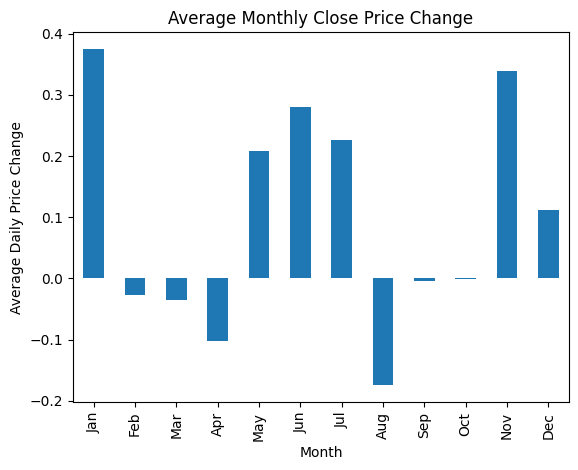

In [ ]:
# show close prices for each year. x-axis should be months and y-axis should be close price
df = timezone_fix(df)  # Ensure index is timezone-naive

df['Year'] = df.index.year
df['Month'] = df.index.month

# Plot close prices for each year with months on x-axis
for year, group in df.groupby('Year'):
	plt.plot(group['Month'], group['Close'], label=str(year))

plt.title(f"{s_ticker} Close Price by Year")
plt.xlabel("Month")
plt.ylabel("Close Price")
plt.legend(title="Year")
plt.show()


# Looks like August may provide a buying opportunity for stock ticker C

In [299]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt


import statsmodels.api as sm
from statsmodels.tsa.filters.filtertools import convolution_filter
import statsmodels.graphics.tsaplots as tsplots
from statsmodels.tsa.seasonal import seasonal_decompose, STL, MSTL
from statsmodels.tsa.forecasting.stl import STLForecast
from statsmodels.tsa.arima.model import ARIMA

In [303]:
# Set start and end dates from the file's date range
import yfinance as yf
start = str(df.index.min().date())
end = str(df.index.max().date())
train_start = start
train_end = '2023-12-31'
test_start = train_end
test_end = end
period = 12 # for STL decomposition
print(f"Training period: {train_start} to {train_end}")

Training period: 2023-08-02 to 2023-12-31


In [301]:
# create train and test dataframes
train_df = df[(df.index >= train_start) & (df.index <= train_end)]
test_df = df[(df.index >= test_start) & (df.index <= test_end)]

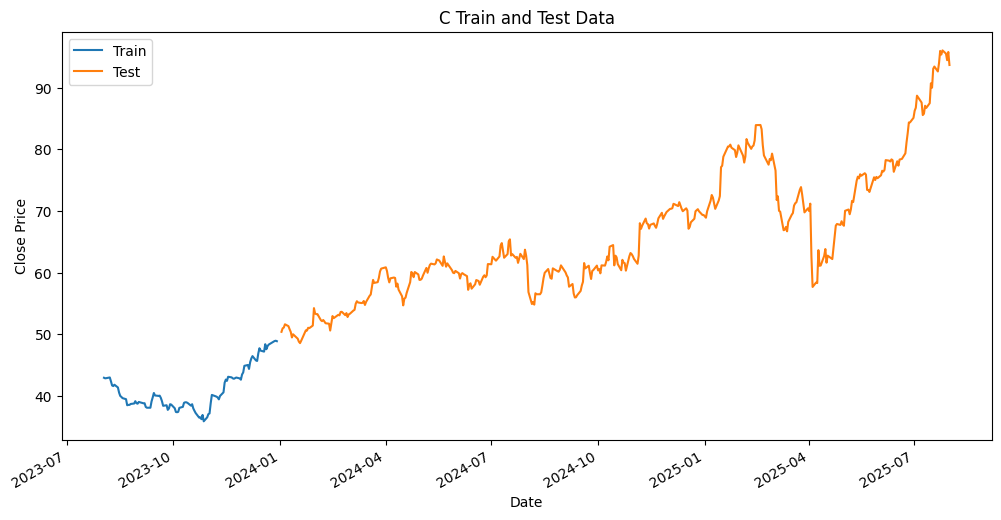

In [302]:
# plot the train and test dataframes
train_df['Close'].plot(label='Train', figsize=(12, 6))
test_df['Close'].plot(label='Test')
plt.title(f"{s_ticker} Train and Test Data")
plt.ylabel("Close Price")
plt.legend()
plt.show()